# IQM Benchmarks: Summary Notebook

In [1]:
%load_ext autoreload
%autoreload 2

## Choose (or define) a backend

In [23]:
#backend = "fakeadonis"
backend = "fakeapollo"
#backend = "garnet"
#backend = "deneb"

#from iqm.qiskit_iqm.iqm_provider import IQMProvider
#iqm_url="https:"
#provider = IQMProvider(iqm_url)
#backend = provider.get_backend()

## Set IQM Token if using Resonance.

In [24]:
# import os
# os.environ["IQM_TOKEN"] = ""

## Clifford Randomized Benchmarking

NB: Clifford RB is executed by default with Interleaved RB !

In [20]:
from iqm.benchmarks.randomized_benchmarking.clifford_rb.clifford_rb import *

In [25]:
EXAMPLE_CRB = CliffordRBConfiguration(
    qubits_array=[[2,3]],#,[8,9],[13,14],[17,18],[5,6],[10,11],[15,16]],
    sequence_lengths=[2**(m+1)-1 for m in range(7)],
    num_circuit_samples=25,
    shots=2**8,
    calset_id=None,
    parallel_execution=False,
)

In [26]:
benchmark_clifford_rb = CliffordRandomizedBenchmarking(backend, EXAMPLE_CRB)
run_clifford_rb = benchmark_clifford_rb.run()

2025-03-13 11:50:14,877 - iqm.benchmarks.logging_config - INFO - Clifford dictionaries imported successfully !
2025-03-13 11:50:14,877 - iqm.benchmarks.logging_config - INFO - Executing sequential Clifford RB on qubits [2, 3]. Will generate and submit all 25 Clifford RB circuits for each depth [1, 3, 7, 15, 31, 63, 127]
2025-03-13 11:50:14,877 - iqm.benchmarks.logging_config - INFO - Now at sequence length 1
2025-03-13 11:50:15,091 - iqm.benchmarks.logging_config - INFO - Now at sequence length 3
2025-03-13 11:50:15,517 - iqm.benchmarks.logging_config - INFO - Now at sequence length 7
2025-03-13 11:50:16,508 - iqm.benchmarks.logging_config - INFO - Now at sequence length 15
2025-03-13 11:50:18,507 - iqm.benchmarks.logging_config - INFO - Now at sequence length 31
2025-03-13 11:50:32,168 - iqm.benchmarks.logging_config - INFO - Now at sequence length 63
2025-03-13 11:50:40,188 - iqm.benchmarks.logging_config - INFO - Now at sequence length 127
2025-03-13 11:51:06,721 - iqm.benchmarks.lo

In [27]:
result_clifford_rb = benchmark_clifford_rb.analyze()

2025-03-13 11:51:15,557 - iqm.benchmarks.logging_config - INFO - Post-processing sequential RB for qubits [[2, 3]]
2025-03-13 11:51:15,567 - iqm.benchmarks.logging_config - INFO - Qubits [2, 3] and depth 1
2025-03-13 11:51:15,576 - iqm.benchmarks.logging_config - INFO - Qubits [2, 3] and depth 3
2025-03-13 11:51:15,578 - iqm.benchmarks.logging_config - INFO - Qubits [2, 3] and depth 7
2025-03-13 11:51:15,590 - iqm.benchmarks.logging_config - INFO - Qubits [2, 3] and depth 15
2025-03-13 11:51:15,602 - iqm.benchmarks.logging_config - INFO - Qubits [2, 3] and depth 31
2025-03-13 11:51:15,611 - iqm.benchmarks.logging_config - INFO - Qubits [2, 3] and depth 63
2025-03-13 11:51:15,626 - iqm.benchmarks.logging_config - INFO - Qubits [2, 3] and depth 127


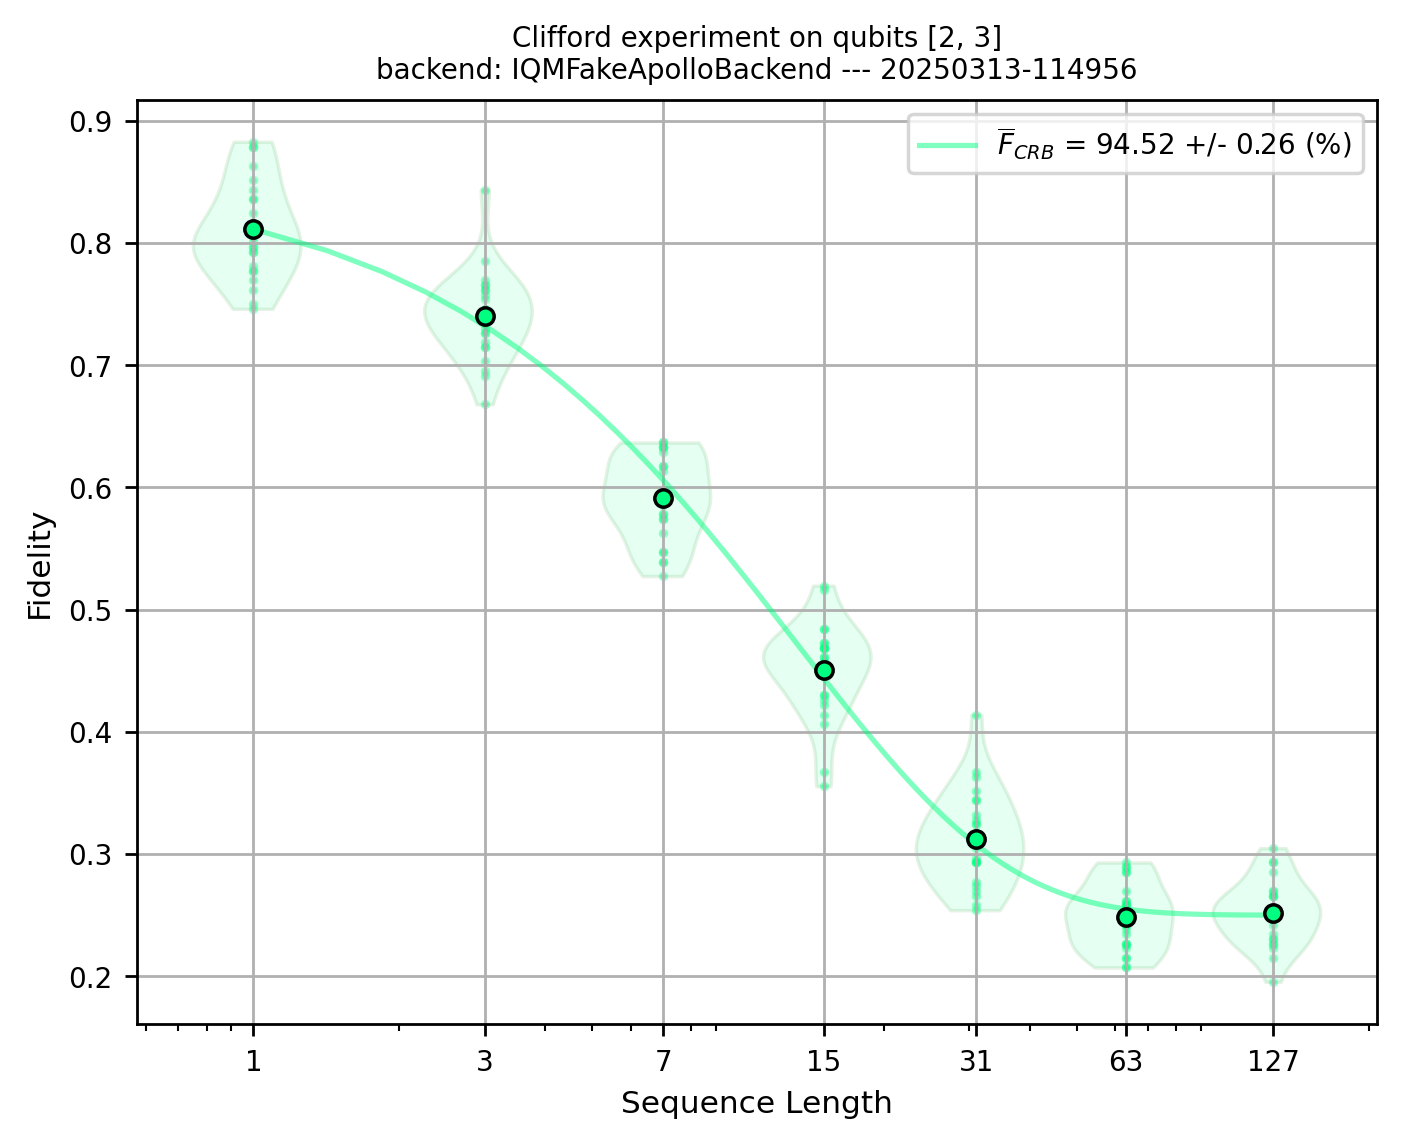

In [28]:
for plot in result_clifford_rb.plots.values():
    display(plot)

## Interleaved Randomized Benchmarking

In [29]:
from iqm.benchmarks.randomized_benchmarking.interleaved_rb.interleaved_rb import *
import numpy as np

In [30]:
EXAMPLE_IRB_1Q = InterleavedRBConfiguration(
    qubits_array=[[0],[1],[2],[3],[4]],
    sequence_lengths=[2**(m+1)-1 for m in range(8)],
    num_circuit_samples=25,
    shots=2**9,
    calset_id=None,
    parallel_execution=False,
    interleaved_gate = "RGate",
    interleaved_gate_params = [np.pi, 0],
    simultaneous_fit = ["amplitude", "offset"],
)

In [31]:
benchmark_irb_1Q = InterleavedRandomizedBenchmarking(backend, EXAMPLE_IRB_1Q)
run_irb_1Q = benchmark_irb_1Q.run()

2025-03-13 11:51:50,021 - iqm.benchmarks.logging_config - INFO - Clifford dictionaries imported successfully !
2025-03-13 11:51:50,599 - iqm.benchmarks.logging_config - INFO - Wxecuting sequential Clifford and Interleaved RB circuits on qubits [0]. Will generate and submit all 25 Clifford RB circuits for each depth [1, 3, 7, 15, 31, 63, 127, 255]
2025-03-13 11:51:50,599 - iqm.benchmarks.logging_config - INFO - Now at sequence length 1
2025-03-13 11:51:50,694 - iqm.benchmarks.logging_config - INFO - Now at sequence length 3
2025-03-13 11:51:50,807 - iqm.benchmarks.logging_config - INFO - Now at sequence length 7
2025-03-13 11:51:51,047 - iqm.benchmarks.logging_config - INFO - Now at sequence length 15
2025-03-13 11:51:51,588 - iqm.benchmarks.logging_config - INFO - Now at sequence length 31
2025-03-13 11:51:52,423 - iqm.benchmarks.logging_config - INFO - Now at sequence length 63
2025-03-13 11:51:54,401 - iqm.benchmarks.logging_config - INFO - Now at sequence length 127
2025-03-13 11:51

In [32]:
result_irb_1Q = benchmark_irb_1Q.analyze()

2025-03-13 12:02:16,782 - iqm.benchmarks.logging_config - INFO - Post-processing sequential Interleaved RB for qubits [[0], [1], [2], [3], [4]]
2025-03-13 12:02:16,894 - iqm.benchmarks.logging_config - INFO - Now on Clifford RB with qubits [0] and depth 1
2025-03-13 12:02:17,021 - iqm.benchmarks.logging_config - INFO - Now on Clifford RB with qubits [0] and depth 3
2025-03-13 12:02:17,133 - iqm.benchmarks.logging_config - INFO - Now on Clifford RB with qubits [0] and depth 7
2025-03-13 12:02:17,229 - iqm.benchmarks.logging_config - INFO - Now on Clifford RB with qubits [0] and depth 15
2025-03-13 12:02:17,357 - iqm.benchmarks.logging_config - INFO - Now on Clifford RB with qubits [0] and depth 31
2025-03-13 12:02:17,452 - iqm.benchmarks.logging_config - INFO - Now on Clifford RB with qubits [0] and depth 63
2025-03-13 12:02:17,565 - iqm.benchmarks.logging_config - INFO - Now on Clifford RB with qubits [0] and depth 127
2025-03-13 12:02:17,677 - iqm.benchmarks.logging_config - INFO - No

In [33]:
result_irb_1Q.observations

[BenchmarkObservation(name='avg_gate_fidelity_interleaved', value=0.9979183032433894, identifier=BenchmarkObservationIdentifier(qubit_indices=[0]), uncertainty=9.144505494191281e-05),
 BenchmarkObservation(name='avg_gate_fidelity_clifford', value=0.9958115103388792, identifier=BenchmarkObservationIdentifier(qubit_indices=[0]), uncertainty=8.17823609003449e-05),
 BenchmarkObservation(name='avg_gate_fidelity_native', value=0.9977661388474022, identifier=BenchmarkObservationIdentifier(qubit_indices=[0]), uncertainty=4.361722520237145e-05),
 BenchmarkObservation(name='avg_gate_fidelity_interleaved', value=0.997958281196824, identifier=BenchmarkObservationIdentifier(qubit_indices=[1]), uncertainty=0.00010535448906517988),
 BenchmarkObservation(name='avg_gate_fidelity_clifford', value=0.996185705320257, identifier=BenchmarkObservationIdentifier(qubit_indices=[1]), uncertainty=9.354178172452585e-05),
 BenchmarkObservation(name='avg_gate_fidelity_native', value=0.9979657095041371, identifier=B

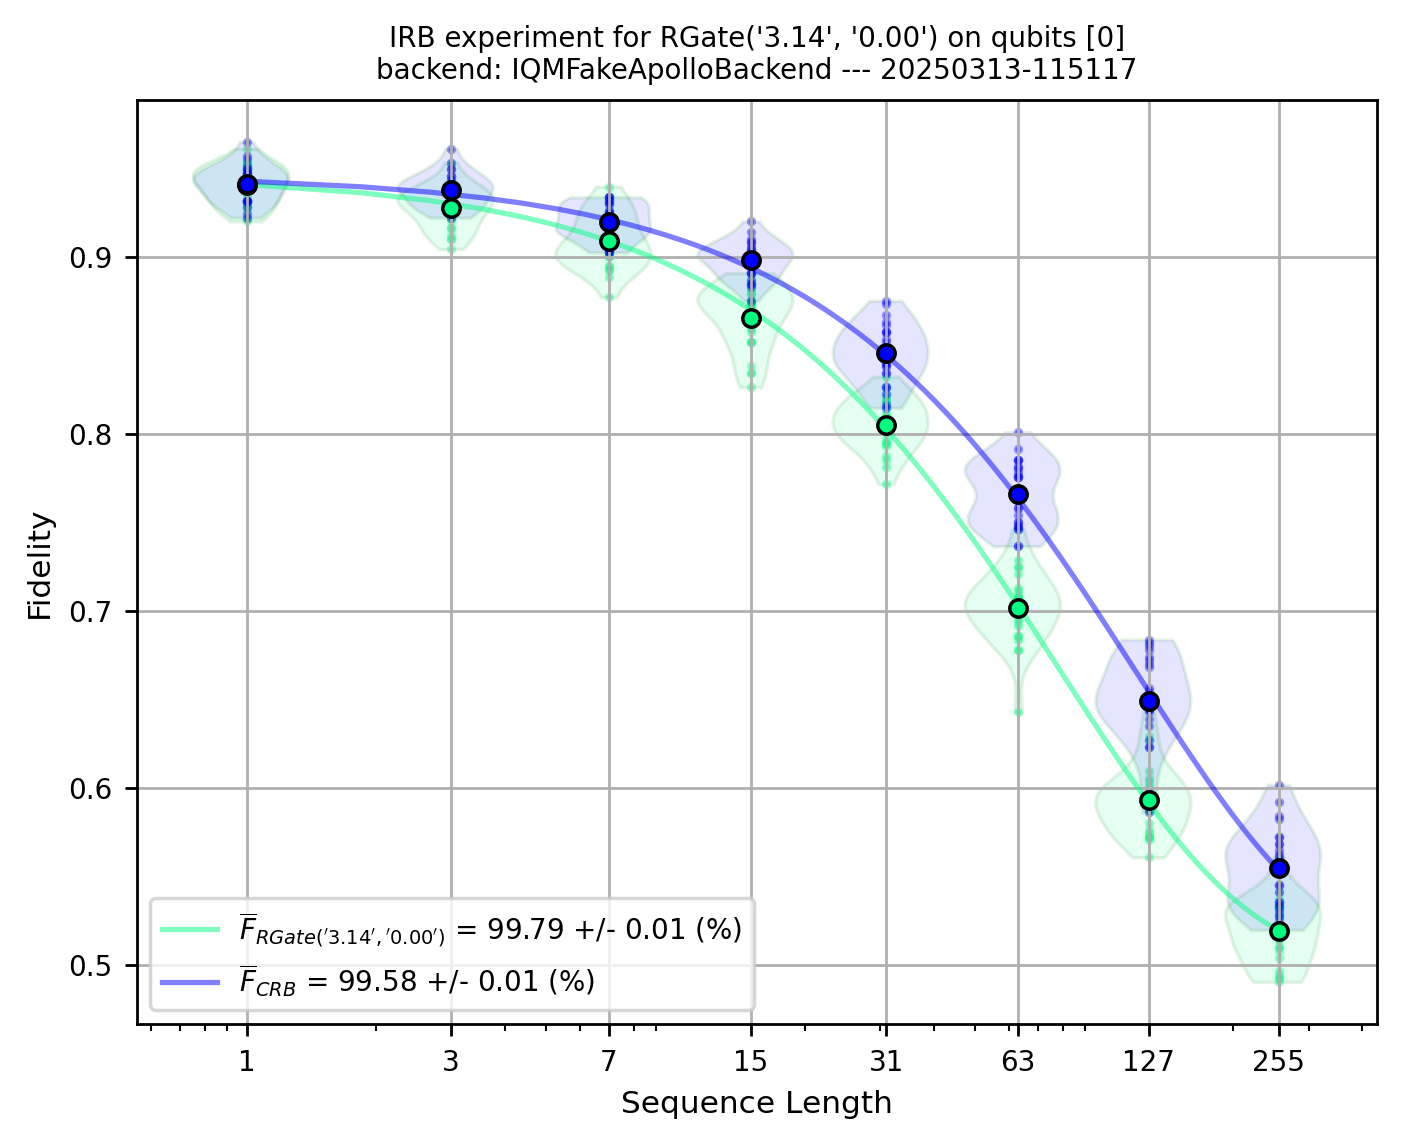

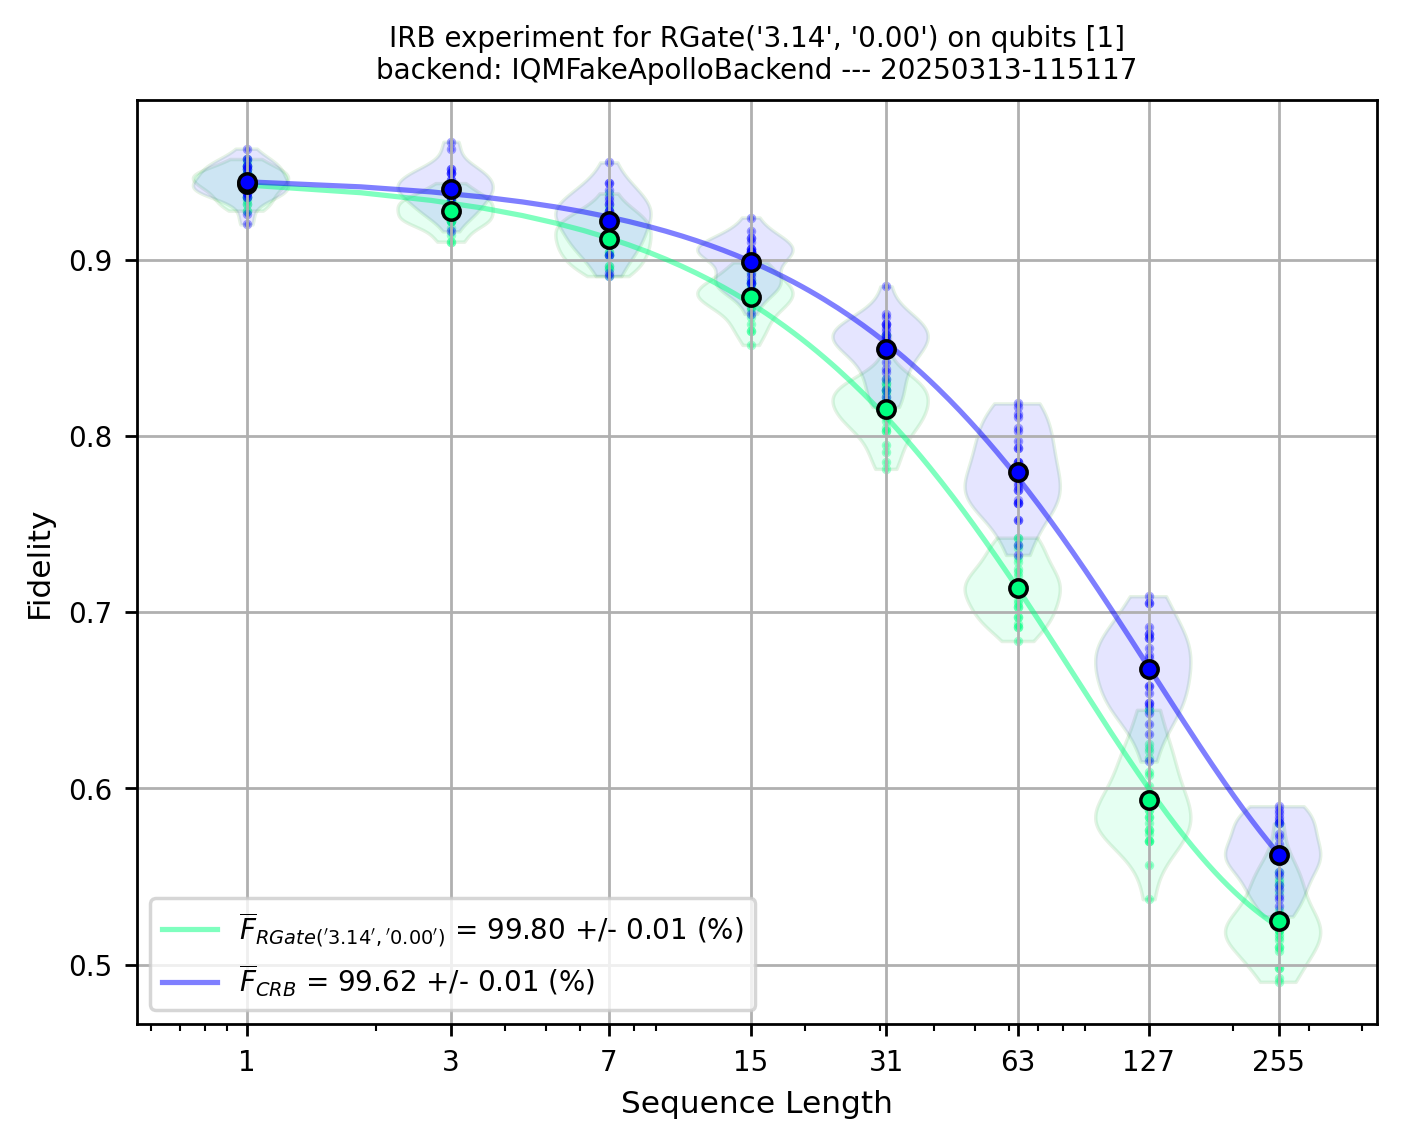

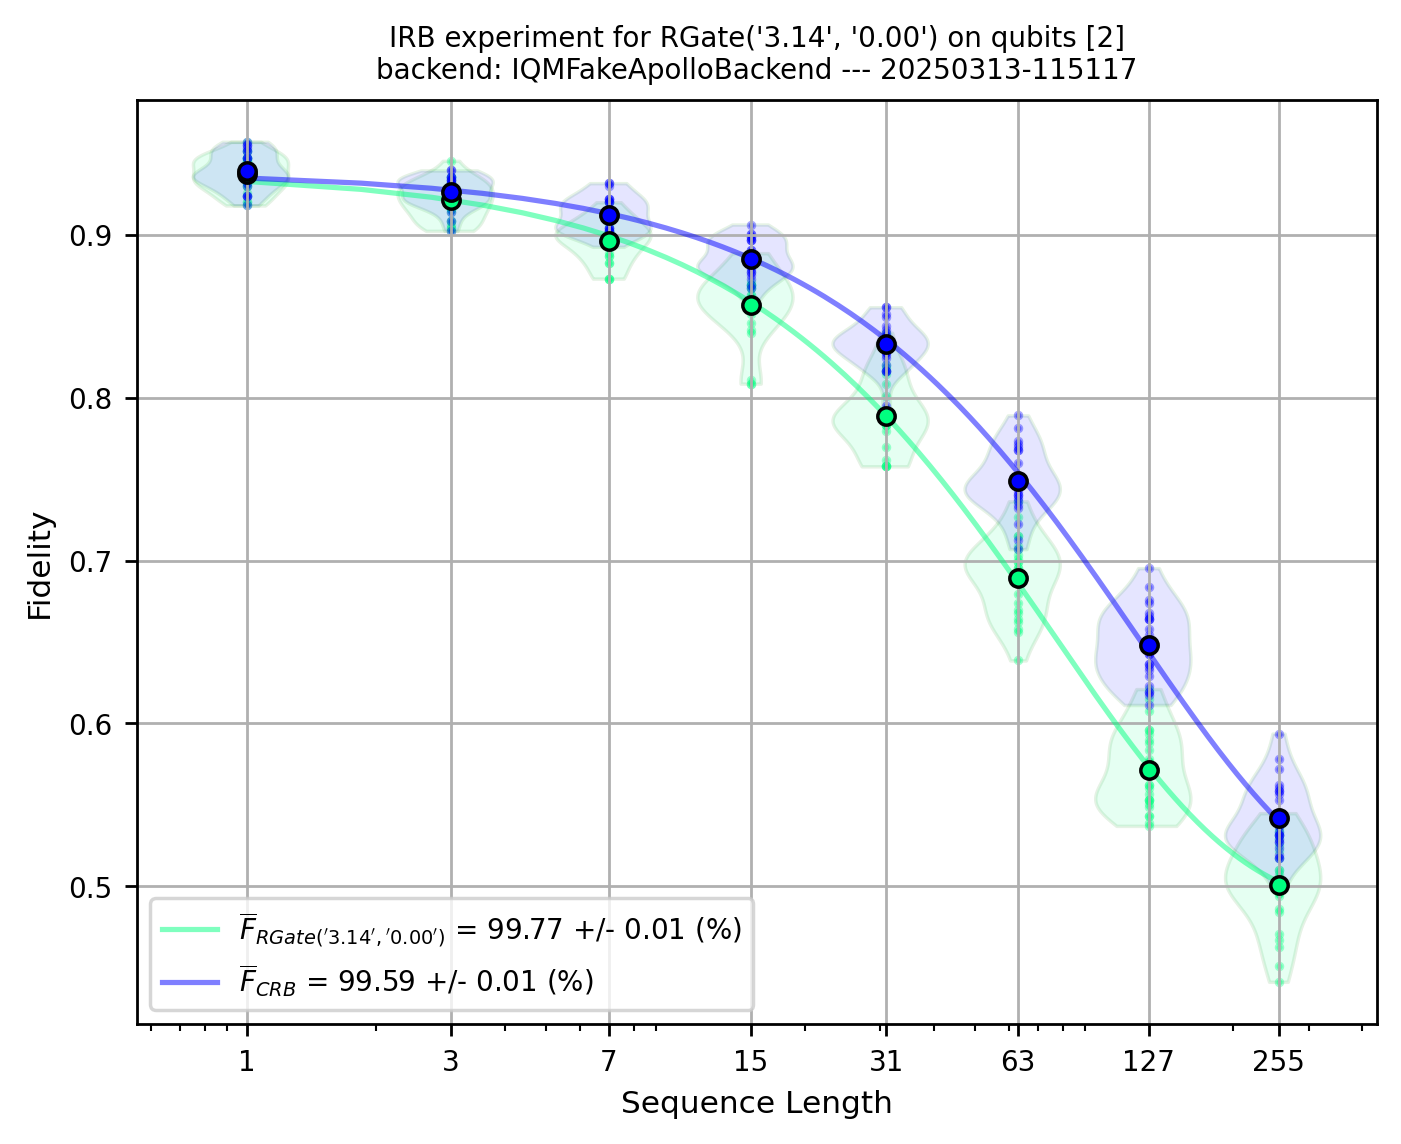

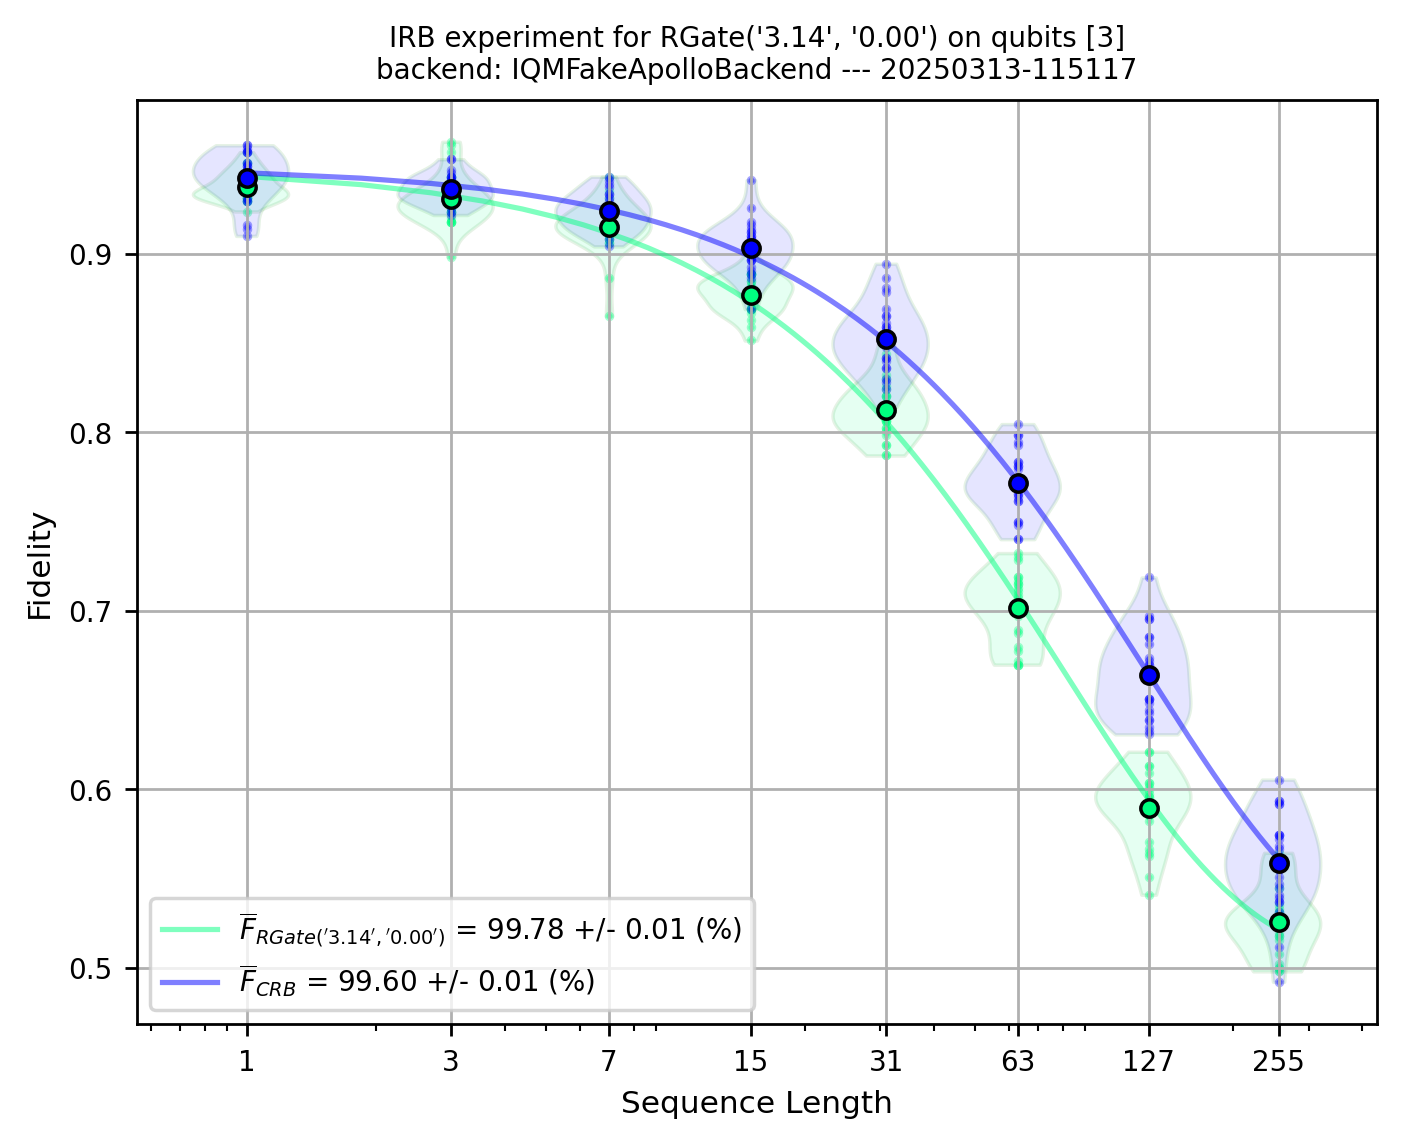

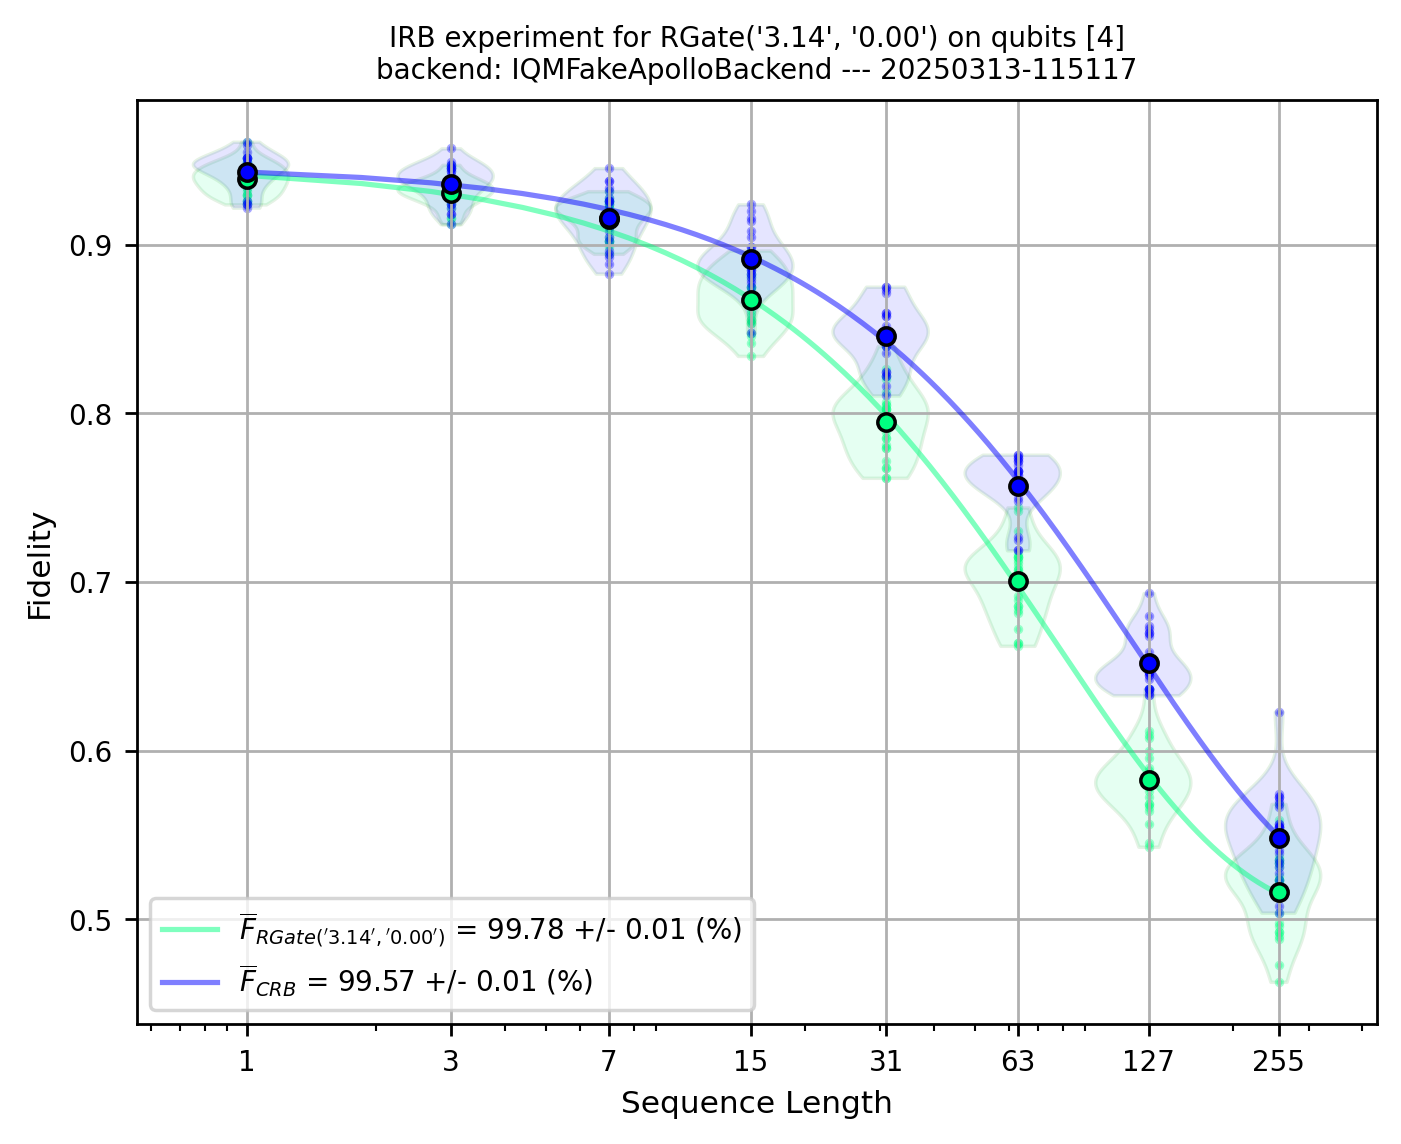

In [34]:
for v in result_irb_1Q.plots.values():
    display(v)

In [36]:
EXAMPLE_IRB_2Q = InterleavedRBConfiguration(
    qubits_array=[[0,1],[0,3],[2,3],[3,4]],
    sequence_lengths=[2**(m+1)-1 for m in range(7)],
    num_circuit_samples=25,
    shots=2**8,
    calset_id=None,
    parallel_execution=False,
    interleaved_gate = "CZGate",
    interleaved_gate_params = None,
    simultaneous_fit = ["amplitude", "offset"],
)

In [37]:
benchmark_irb_2Q = InterleavedRandomizedBenchmarking(backend, EXAMPLE_IRB_2Q)
run_irb_2Q = benchmark_irb_2Q.run()

2025-03-13 12:02:35,304 - iqm.benchmarks.logging_config - INFO - Clifford dictionaries imported successfully !
2025-03-13 12:02:35,315 - iqm.benchmarks.logging_config - INFO - Wxecuting sequential Clifford and Interleaved RB circuits on qubits [0, 1]. Will generate and submit all 25 Clifford RB circuits for each depth [1, 3, 7, 15, 31, 63, 127]
2025-03-13 12:02:35,318 - iqm.benchmarks.logging_config - INFO - Now at sequence length 1
2025-03-13 12:02:35,543 - iqm.benchmarks.logging_config - INFO - Now at sequence length 3
2025-03-13 12:02:36,034 - iqm.benchmarks.logging_config - INFO - Now at sequence length 7
2025-03-13 12:02:37,129 - iqm.benchmarks.logging_config - INFO - Now at sequence length 15
2025-03-13 12:03:09,729 - iqm.benchmarks.logging_config - INFO - Now at sequence length 31
2025-03-13 12:03:13,861 - iqm.benchmarks.logging_config - INFO - Now at sequence length 63
2025-03-13 12:03:22,199 - iqm.benchmarks.logging_config - INFO - Now at sequence length 127
2025-03-13 12:03:4

In [38]:
result_irb_2Q = benchmark_irb_2Q.analyze()

2025-03-13 12:12:01,481 - iqm.benchmarks.logging_config - INFO - Post-processing sequential Interleaved RB for qubits [[0, 1], [0, 3], [2, 3], [3, 4]]
2025-03-13 12:12:01,576 - iqm.benchmarks.logging_config - INFO - Now on Clifford RB with qubits [0, 1] and depth 1
2025-03-13 12:12:01,655 - iqm.benchmarks.logging_config - INFO - Now on Clifford RB with qubits [0, 1] and depth 3
2025-03-13 12:12:01,734 - iqm.benchmarks.logging_config - INFO - Now on Clifford RB with qubits [0, 1] and depth 7
2025-03-13 12:12:01,813 - iqm.benchmarks.logging_config - INFO - Now on Clifford RB with qubits [0, 1] and depth 15
2025-03-13 12:12:01,892 - iqm.benchmarks.logging_config - INFO - Now on Clifford RB with qubits [0, 1] and depth 31
2025-03-13 12:12:01,971 - iqm.benchmarks.logging_config - INFO - Now on Clifford RB with qubits [0, 1] and depth 63
2025-03-13 12:12:02,050 - iqm.benchmarks.logging_config - INFO - Now on Clifford RB with qubits [0, 1] and depth 127
2025-03-13 12:12:02,130 - iqm.benchmark

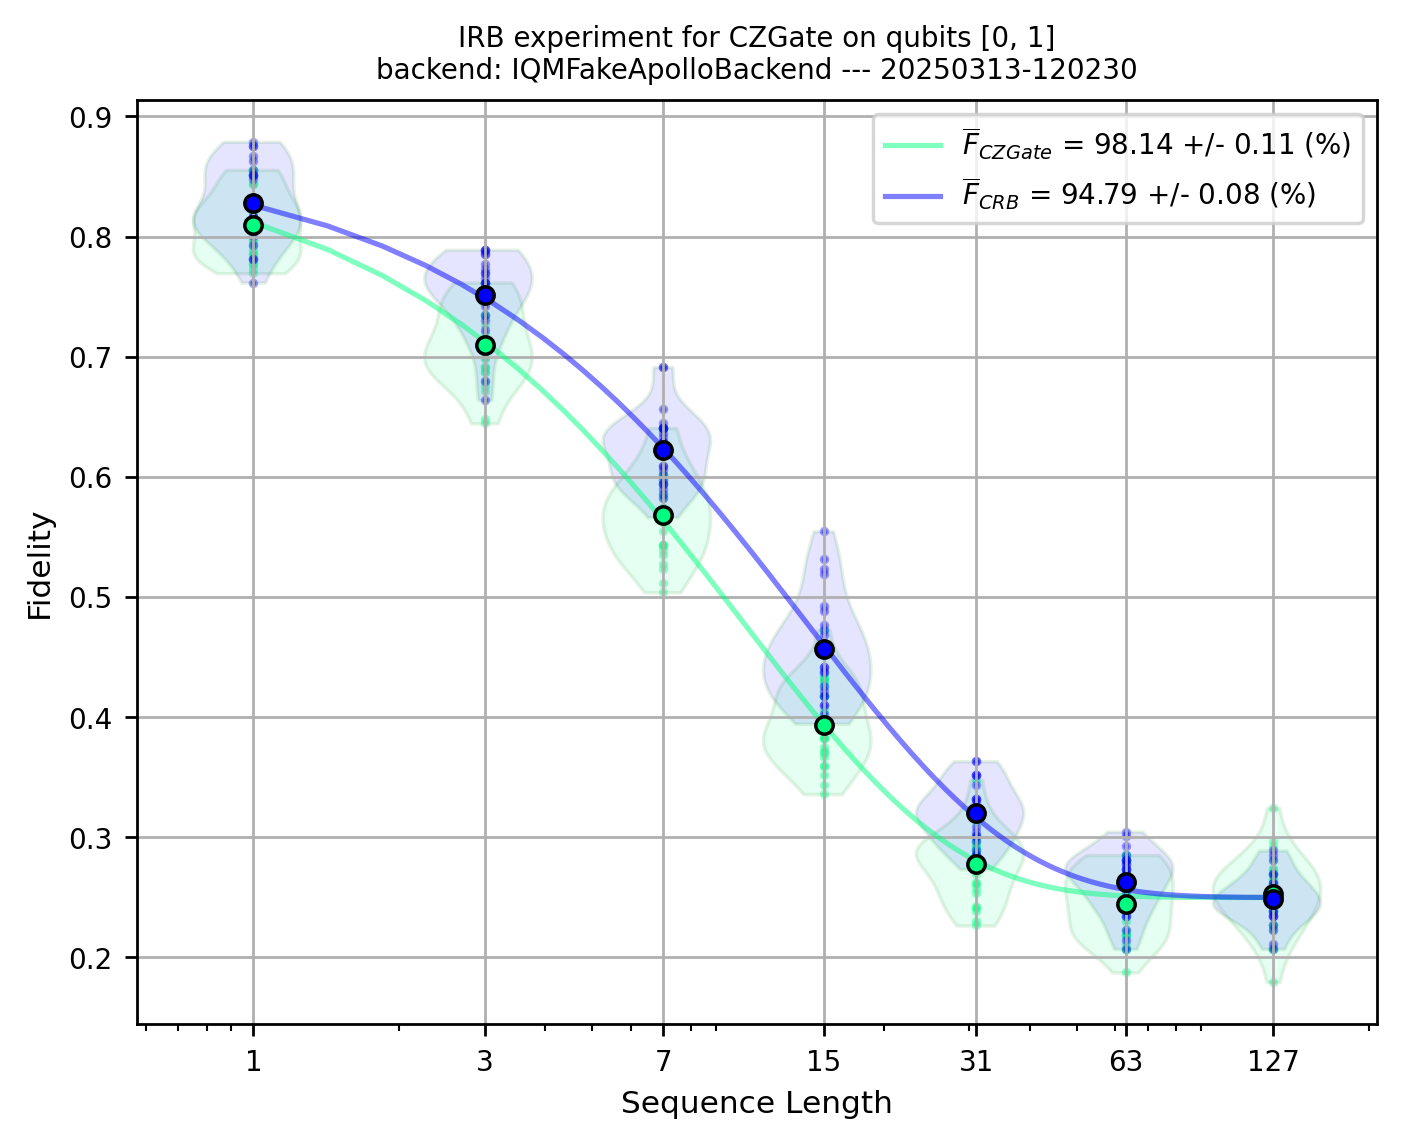

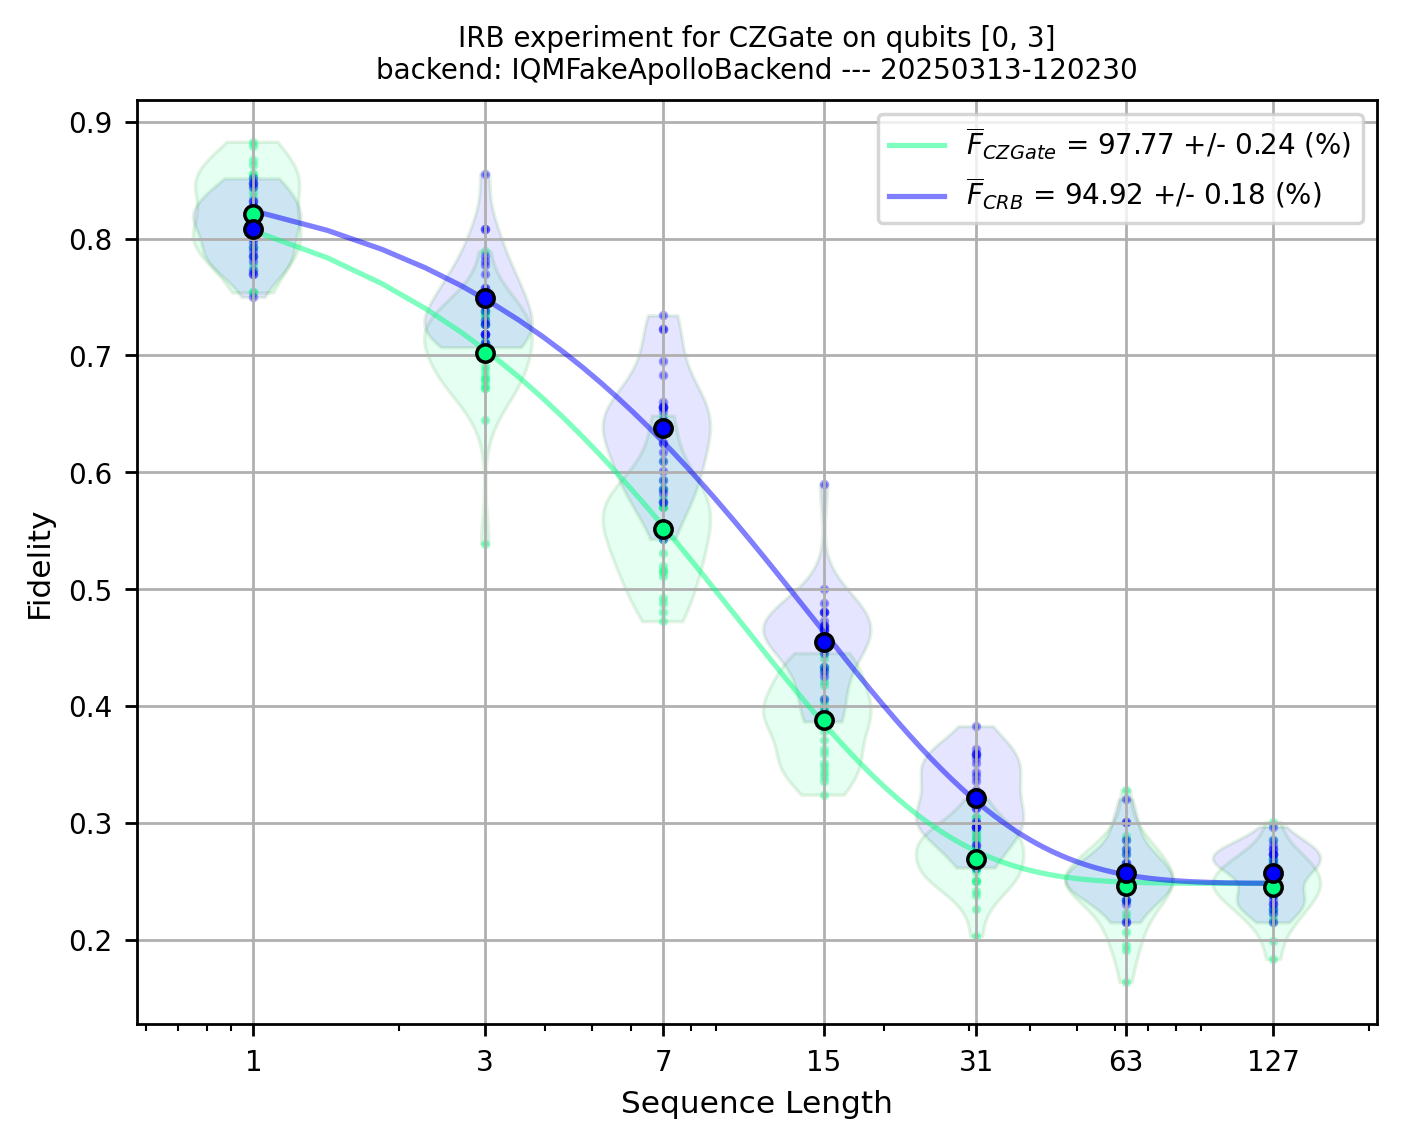

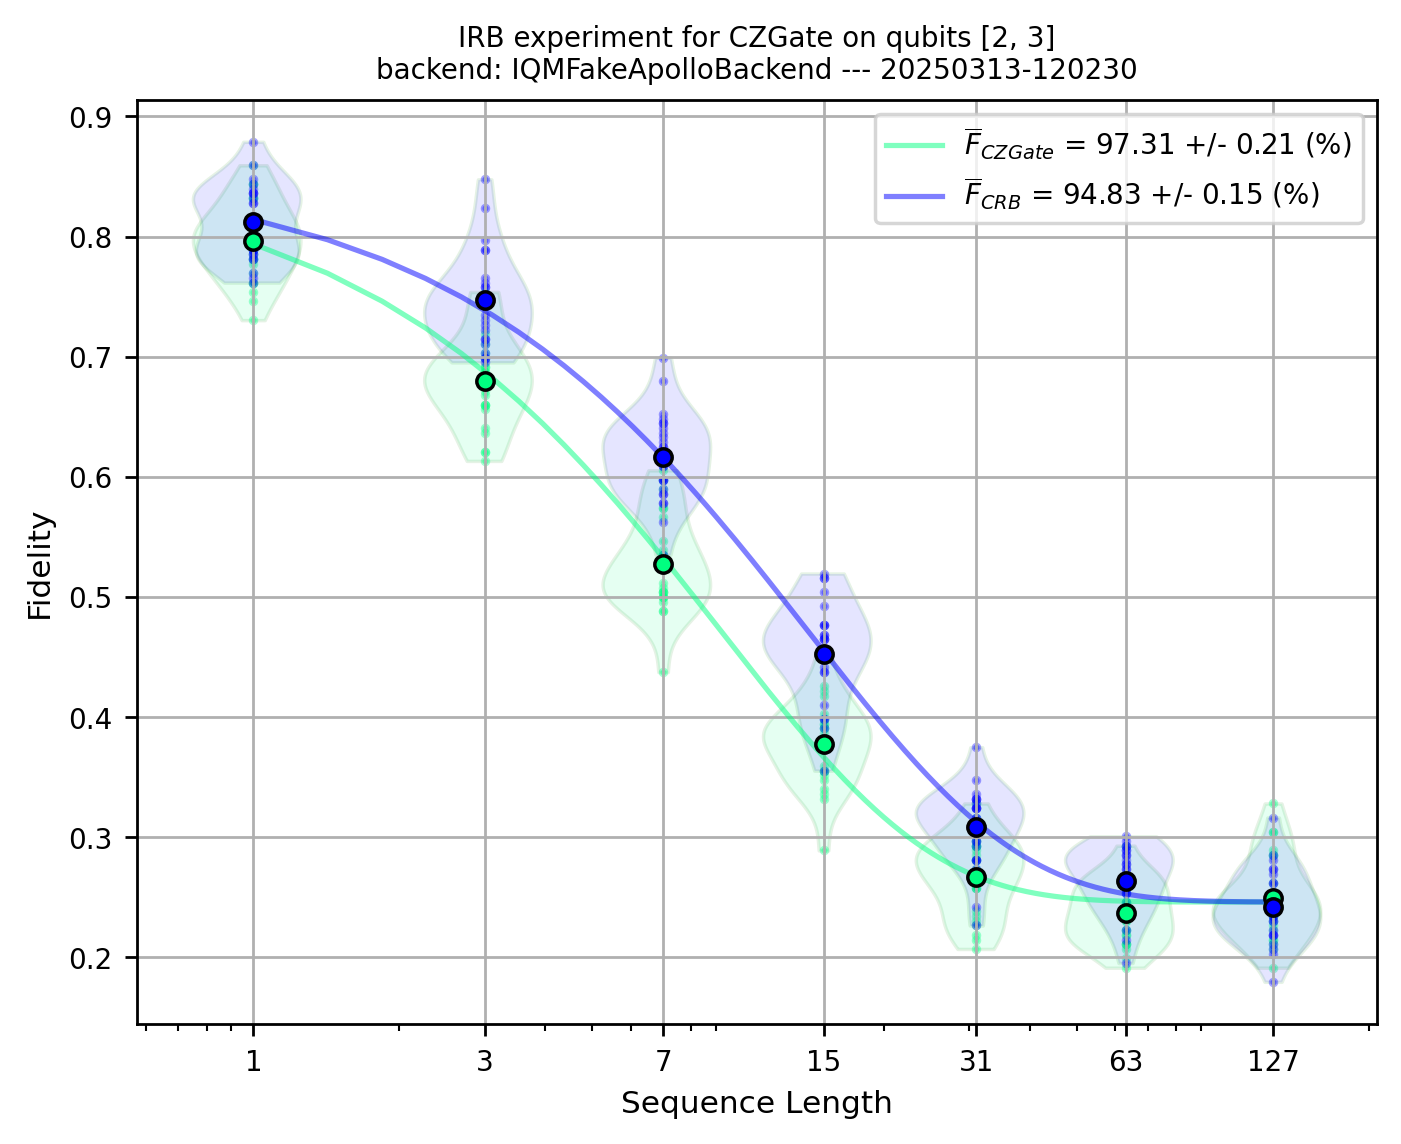

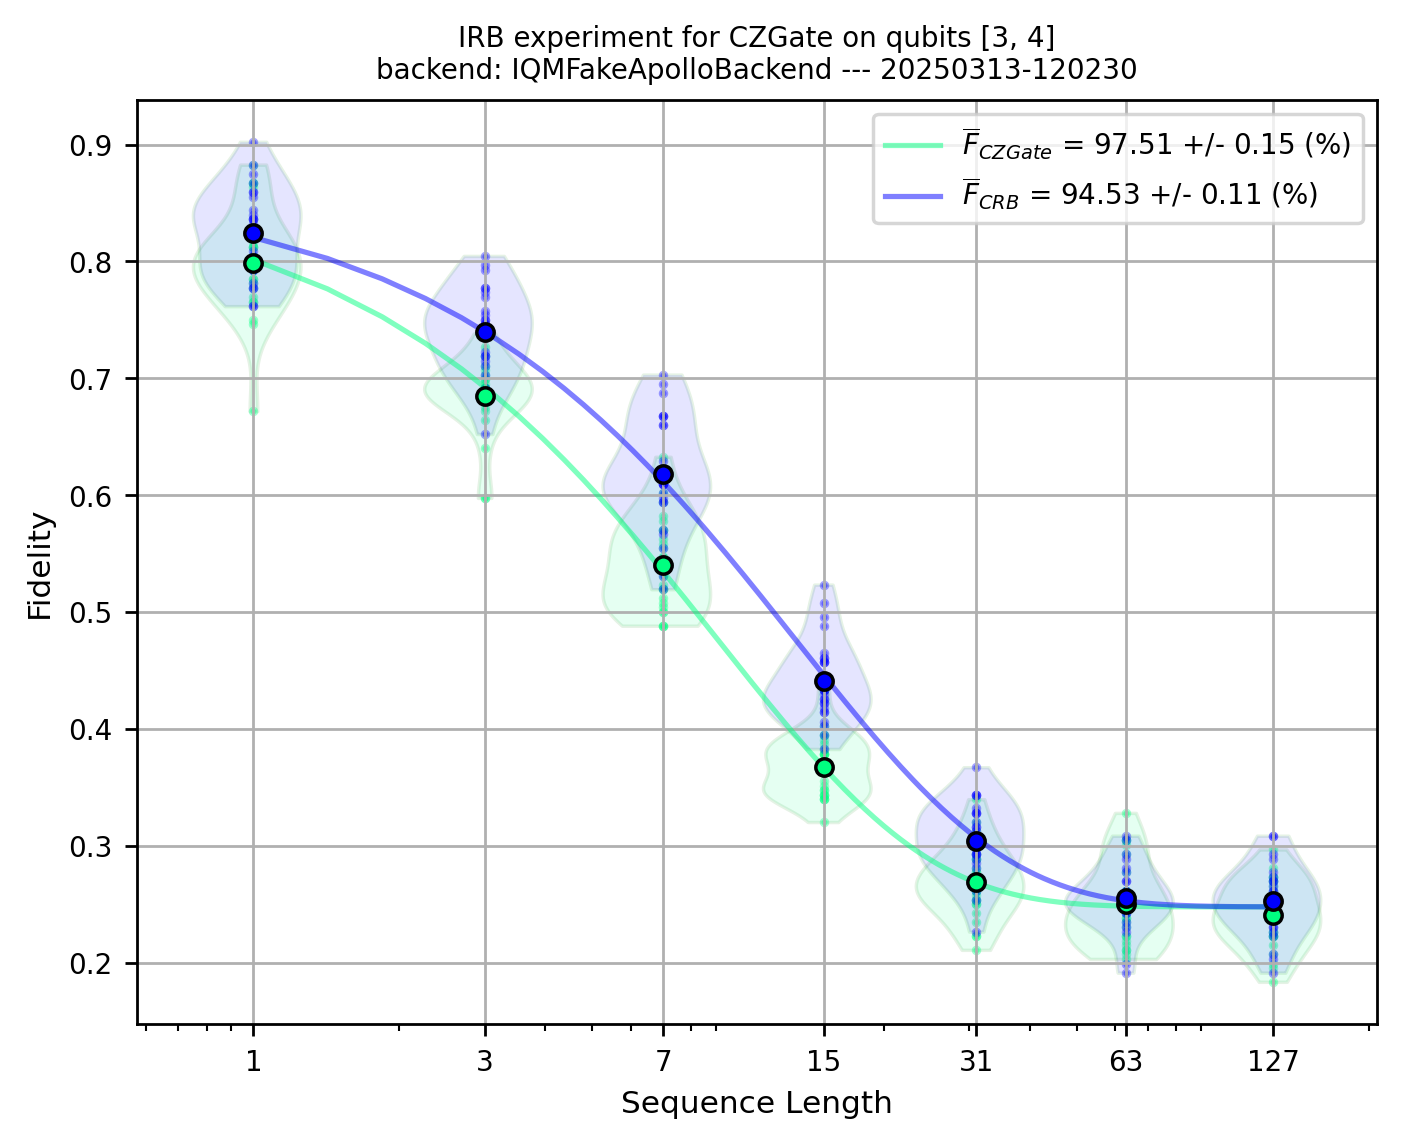

In [39]:
for plot in result_irb_2Q.plots.values():
    display(plot)

In [40]:
EXAMPLE_IRB_iswap = InterleavedRBConfiguration(
    qubits_array=[[0,1],[2,3]],
    sequence_lengths=[2**(m+1)-1 for m in range(7)],
    num_circuit_samples=30,
    shots=2**10,
    calset_id=None,
    parallel_execution=False,
    interleaved_gate = "iSwapGate",
    interleaved_gate_params = None,
    simultaneous_fit = ["amplitude", "offset"],
)

In [41]:
benchmark_irb_iswap = InterleavedRandomizedBenchmarking(backend, EXAMPLE_IRB_iswap)
run_irb_iswap = benchmark_irb_iswap.run()

2025-03-13 12:12:13,253 - iqm.benchmarks.logging_config - INFO - Clifford dictionaries imported successfully !
2025-03-13 12:12:13,269 - iqm.benchmarks.logging_config - INFO - Wxecuting sequential Clifford and Interleaved RB circuits on qubits [0, 1]. Will generate and submit all 30 Clifford RB circuits for each depth [1, 3, 7, 15, 31, 63, 127]
2025-03-13 12:12:13,269 - iqm.benchmarks.logging_config - INFO - Now at sequence length 1
2025-03-13 12:12:13,554 - iqm.benchmarks.logging_config - INFO - Now at sequence length 3
2025-03-13 12:12:14,166 - iqm.benchmarks.logging_config - INFO - Now at sequence length 7
2025-03-13 12:12:15,156 - iqm.benchmarks.logging_config - INFO - Now at sequence length 15
2025-03-13 12:12:17,077 - iqm.benchmarks.logging_config - INFO - Now at sequence length 31
2025-03-13 12:12:20,824 - iqm.benchmarks.logging_config - INFO - Now at sequence length 63
2025-03-13 12:12:28,388 - iqm.benchmarks.logging_config - INFO - Now at sequence length 127
2025-03-13 12:12:4

In [42]:
result_irb_iswap = benchmark_irb_iswap.analyze()

2025-03-13 12:18:06,953 - iqm.benchmarks.logging_config - INFO - Post-processing sequential Interleaved RB for qubits [[0, 1], [2, 3]]
2025-03-13 12:18:06,985 - iqm.benchmarks.logging_config - INFO - Now on Clifford RB with qubits [0, 1] and depth 1
2025-03-13 12:18:07,039 - iqm.benchmarks.logging_config - INFO - Now on Clifford RB with qubits [0, 1] and depth 3
2025-03-13 12:18:07,081 - iqm.benchmarks.logging_config - INFO - Now on Clifford RB with qubits [0, 1] and depth 7
2025-03-13 12:18:07,140 - iqm.benchmarks.logging_config - INFO - Now on Clifford RB with qubits [0, 1] and depth 15
2025-03-13 12:18:07,191 - iqm.benchmarks.logging_config - INFO - Now on Clifford RB with qubits [0, 1] and depth 31
2025-03-13 12:18:07,223 - iqm.benchmarks.logging_config - INFO - Now on Clifford RB with qubits [0, 1] and depth 63
2025-03-13 12:18:07,287 - iqm.benchmarks.logging_config - INFO - Now on Clifford RB with qubits [0, 1] and depth 127
2025-03-13 12:18:07,319 - iqm.benchmarks.logging_config

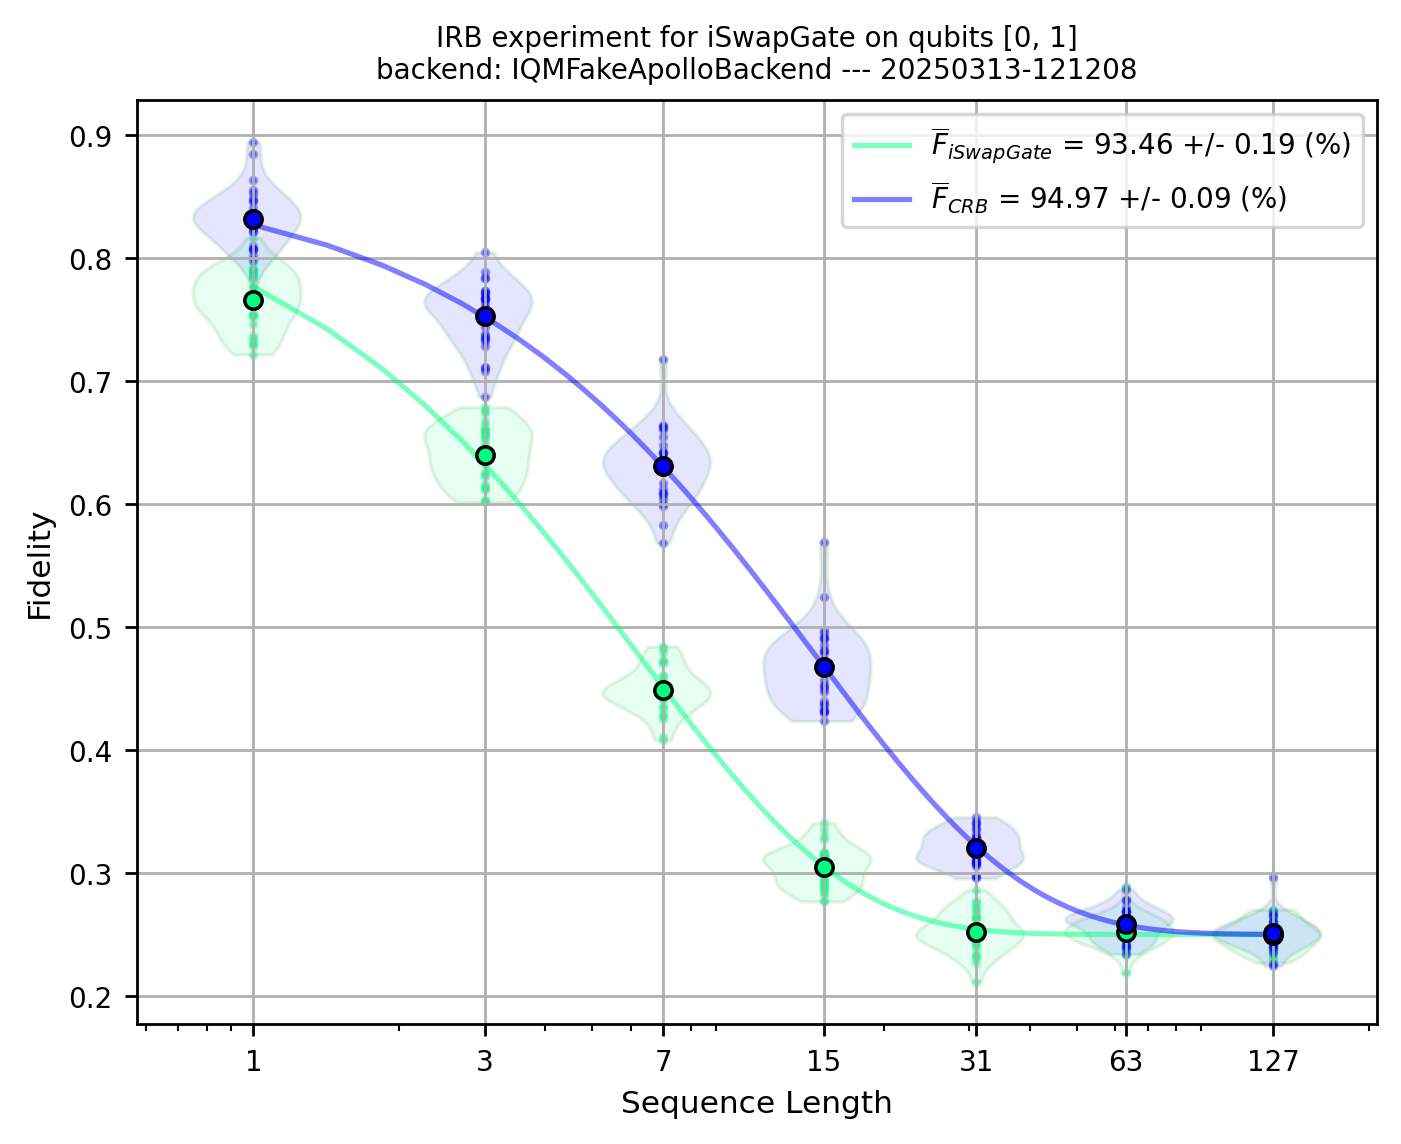

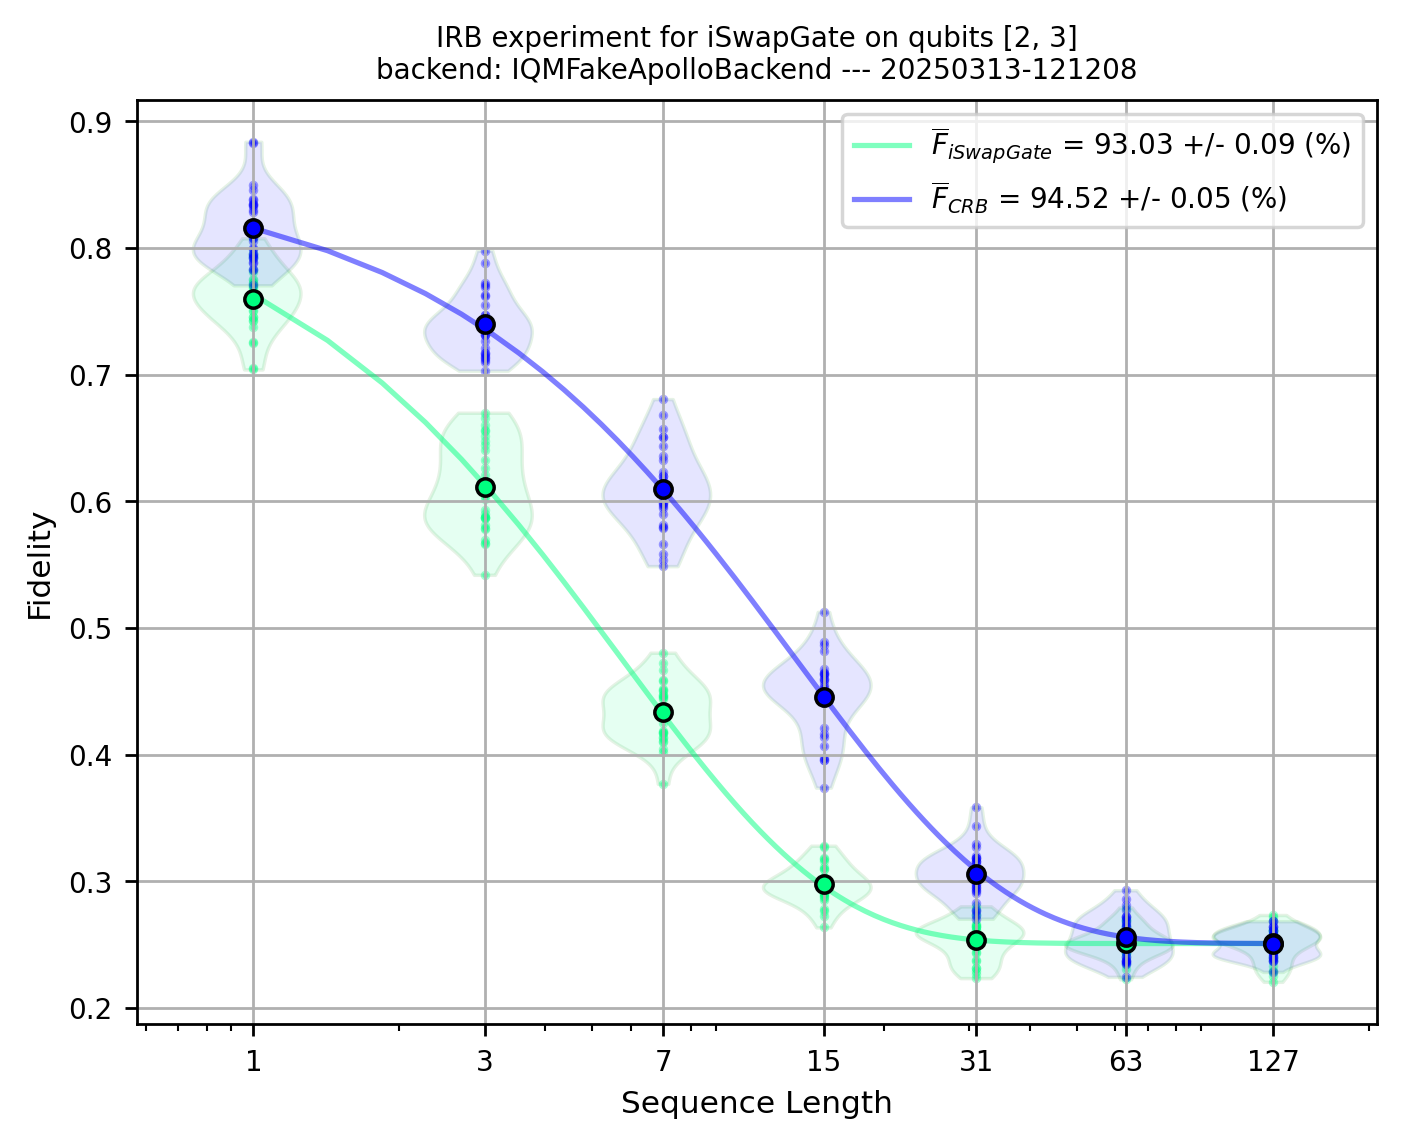

In [43]:
for plot in result_irb_iswap.plots.values():
    display(plot)

## Mirror Randomized Benchmarking

In [50]:
from iqm.benchmarks.randomized_benchmarking.mirror_rb.mirror_rb import *

In [45]:
EXAMPLE_MRB = MirrorRBConfiguration(
    qubits_array=[[0,1],
                  [0,1,4]],
                  # [0,1,2,3],
                  # [0,1,2,3,4]],
                  #[0,1,3,4,8,9,13,14]],
                  # [0,1,3,4,8,9,13,14,17,18],
                  # [0,1,3,4,8,9,13,14,17,18,2,7],
                  # [0,1,3,4,8,9,13,14,17,18,2,7,5,10],
                  # [0,1,3,4,8,9,13,14,17,18,2,7,5,10,6,11]],
                  # [0,1,3,4,8,9,13,14,17,18,2,7,5,10,6,11,15,16],
                  # [0,1,3,4,8,9,13,14,17,18,2,7,5,10,6,11,15,16,12,19]],
    depths_array=[[2**m for m in range(9)],
                  [2**m for m in range(8)]],
                  # [2**m for m in range(7)],
                  # [2**m for m in range(6)]],
                  # [2**(m+1)-1 for m in range(6)],
                  # [2**(m+1)-1 for m in range(6)],
                  # [2**(m+1)-1 for m in range(5)],
                  # [2**(m+1)-1 for m in range(5)],
                  # [2**(m+1)-1 for m in range(4)],
                  # [2**(m+1)-1 for m in range(4)]],
    num_circuit_samples=10,
    num_pauli_samples=5,
    shots=2**8,
    qiskit_optim_level=1,
    routing_method="sabre",
    two_qubit_gate_ensemble={"CZGate": 0.8, "iSwapGate": 0.2},
    density_2q_gates=0.25,
    calset_id=None,
)

In [46]:
benchmark_mrb = MirrorRandomizedBenchmarking(backend, EXAMPLE_MRB)
run_mrb = benchmark_mrb.run()

2025-03-13 12:18:10,367 - iqm.benchmarks.logging_config - INFO - Executing MRB on qubits [0, 1]. Will generate and submit all 10x5 MRB circuits for each depth [2, 4, 8, 16, 32, 64, 128, 256, 512]
2025-03-13 12:18:10,367 - iqm.benchmarks.logging_config - INFO - Depth 2 - Generating all circuits
2025-03-13 12:18:10,622 - iqm.benchmarks.logging_config - INFO - Transpiling for backend IQMFakeApolloBackend with optimization level 1, sabre routing method including SQG optimization all circuits
2025-03-13 12:18:10,865 - iqm.benchmarks.logging_config - INFO - Transpiling for backend IQMFakeApolloBackend with optimization level 1, sabre routing method including SQG optimization all circuits
2025-03-13 12:18:11,050 - iqm.benchmarks.logging_config - INFO - Transpiling for backend IQMFakeApolloBackend with optimization level 1, sabre routing method including SQG optimization all circuits
2025-03-13 12:18:11,305 - iqm.benchmarks.logging_config - INFO - Transpiling for backend IQMFakeApolloBackend w

In [47]:
result_mrb = benchmark_mrb.analyze()

2025-03-13 12:27:48,449 - iqm.benchmarks.logging_config - INFO - Post-processing MRB for qubits [0, 1]
2025-03-13 12:27:48,517 - iqm.benchmarks.logging_config - INFO - Depth 2
2025-03-13 12:27:48,517 - iqm.benchmarks.logging_config - INFO - Getting simulation counts
2025-03-13 12:27:48,764 - iqm.benchmarks.logging_config - INFO - Depth 4
2025-03-13 12:27:48,766 - iqm.benchmarks.logging_config - INFO - Getting simulation counts
2025-03-13 12:27:49,012 - iqm.benchmarks.logging_config - INFO - Depth 8
2025-03-13 12:27:49,012 - iqm.benchmarks.logging_config - INFO - Getting simulation counts
2025-03-13 12:27:49,267 - iqm.benchmarks.logging_config - INFO - Depth 16
2025-03-13 12:27:49,267 - iqm.benchmarks.logging_config - INFO - Getting simulation counts
2025-03-13 12:27:49,512 - iqm.benchmarks.logging_config - INFO - Depth 32
2025-03-13 12:27:49,512 - iqm.benchmarks.logging_config - INFO - Getting simulation counts
2025-03-13 12:27:49,757 - iqm.benchmarks.logging_config - INFO - Depth 64
2

In [48]:
result_mrb.plots

{'[0, 1]': <Figure size 1600x1200 with 1 Axes>,
 '[0, 1, 4]': <Figure size 1600x1200 with 1 Axes>,
 'all_qubit_layouts': <Figure size 1600x1200 with 1 Axes>}

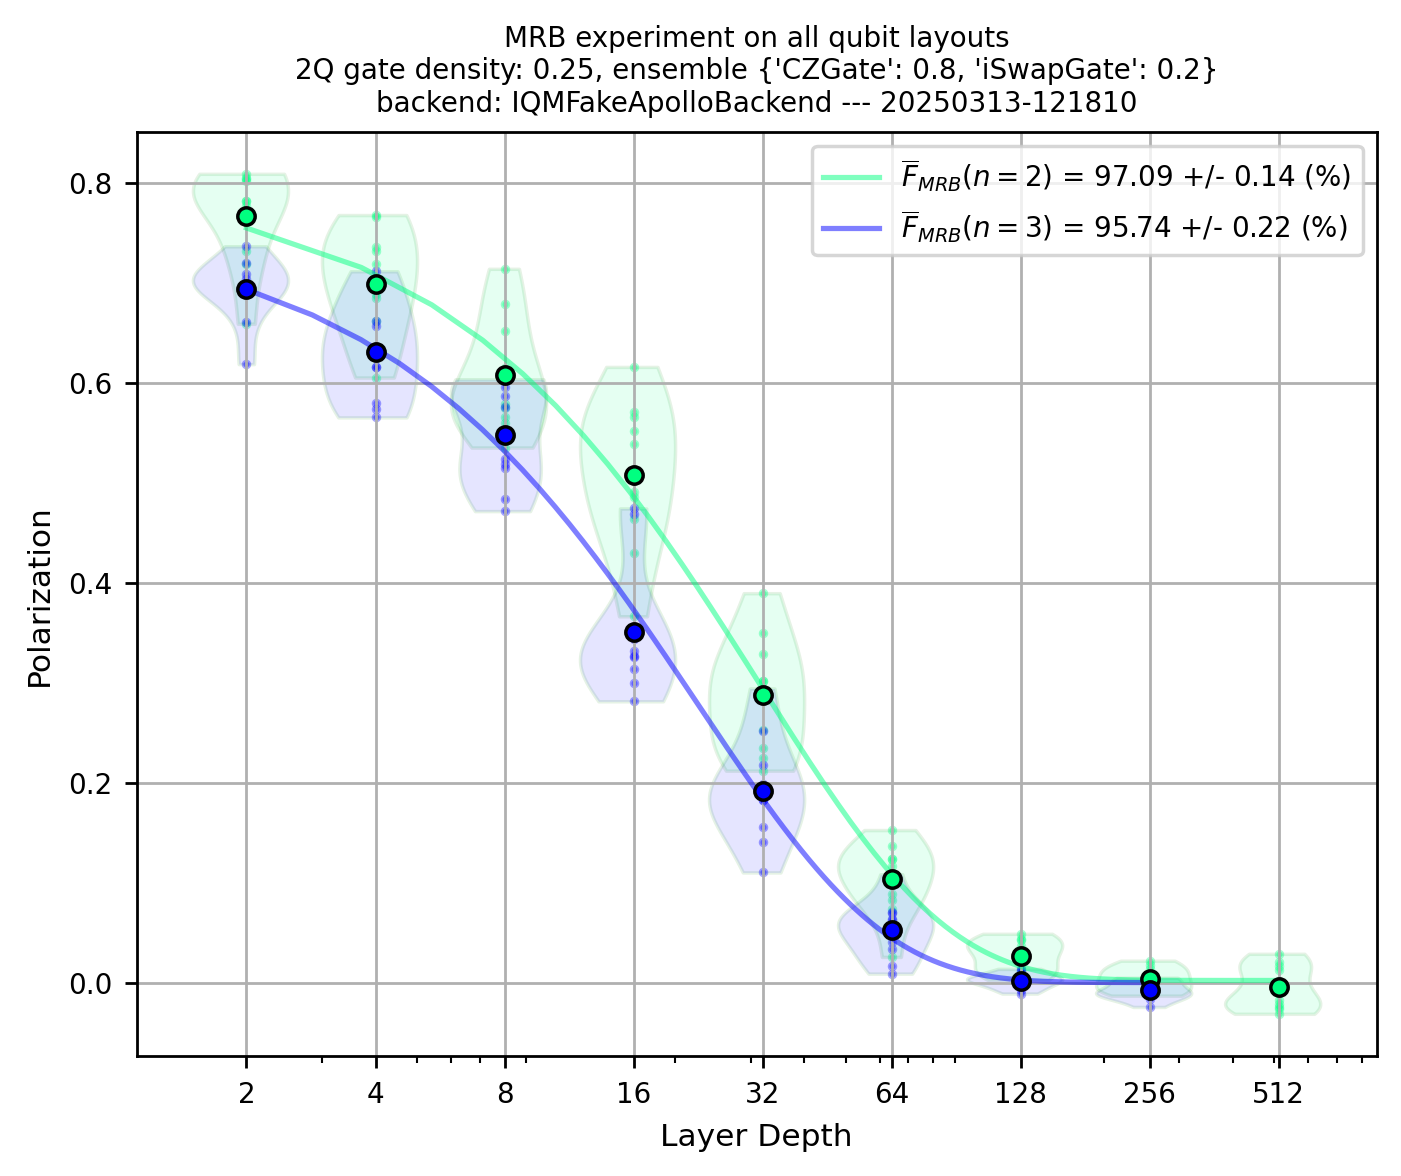

In [49]:
key_mrb_plot = "all_qubit_layouts"
result_mrb.plot(key_mrb_plot)

## Quantum Volume

In [52]:
from iqm.benchmarks.quantum_volume.quantum_volume import *

In [53]:
EXAMPLE_QV = QuantumVolumeConfiguration(
    num_circuits=500,
    shots=2**8,
    calset_id=None,
    num_sigmas=2,
    choose_qubits_routine="custom",
    custom_qubits_array=[[0,1,3,4], [0,1,3,4,5]],#, [0,1,3,4,5]],
    qiskit_optim_level=3,
    optimize_sqg=True,
    max_gates_per_batch=60_000,
    rem=True,
    mit_shots=1_000,
)

In [54]:
benchmark_qv = QuantumVolumeBenchmark(backend, EXAMPLE_QV)
run0_qv = benchmark_qv.run()

2025-03-13 15:10:30,785 - iqm.benchmarks.logging_config - INFO - Executing QV on qubits [0, 1, 3, 4]
2025-03-13 15:10:31,837 - iqm.benchmarks.logging_config - INFO - Successfully generated all 500 circuits to be executed
2025-03-13 15:10:31,850 - iqm.benchmarks.logging_config - INFO - Will transpile according to "fixed" physical layout
2025-03-13 15:10:31,850 - iqm.benchmarks.logging_config - INFO - Transpiling for backend IQMFakeApolloBackend with optimization level 3, sabre routing method including SQG optimization all circuits
2025-03-13 15:11:00,637 - iqm.benchmarks.logging_config - INFO - Submitting batch with 500 circuits corresponding to qubits [0, 1, 3, 4]
2025-03-13 15:11:00,669 - iqm.benchmarks.logging_config - INFO - max_gates_per_batch restriction: submitting subbatch #1 with 500 circuits corresponding to qubits [0, 1, 3, 4]
2025-03-13 15:11:02,201 - iqm.benchmarks.logging_config - INFO - Job for layout [0, 1, 3, 4] submitted successfully!
2025-03-13 15:11:02,264 - iqm.benc

In [55]:
result0_qv = benchmark_qv.analyze()

2025-03-13 15:12:18,820 - iqm.benchmarks.logging_config - INFO - Noiseless simulation and post-processing for layout [0, 1, 3, 4]
2025-03-13 15:12:20,688 - iqm.benchmarks.logging_config - INFO - Noiseless simulation and post-processing for layout [0, 1, 3, 4, 5]
2025-03-13 15:12:22,722 - iqm.benchmarks.logging_config - INFO - REM post-processing for layout [0, 1, 3, 4] with 1000 shots
2025-03-13 15:12:22,792 - iqm.benchmarks.logging_config - INFO - REM post-processing for layout [0, 1, 3, 4, 5] with 1000 shots


In [56]:
#run1_qv = benchmark_qv.run()

In [57]:
#result1_qv = benchmark.analyze(run_index=0)

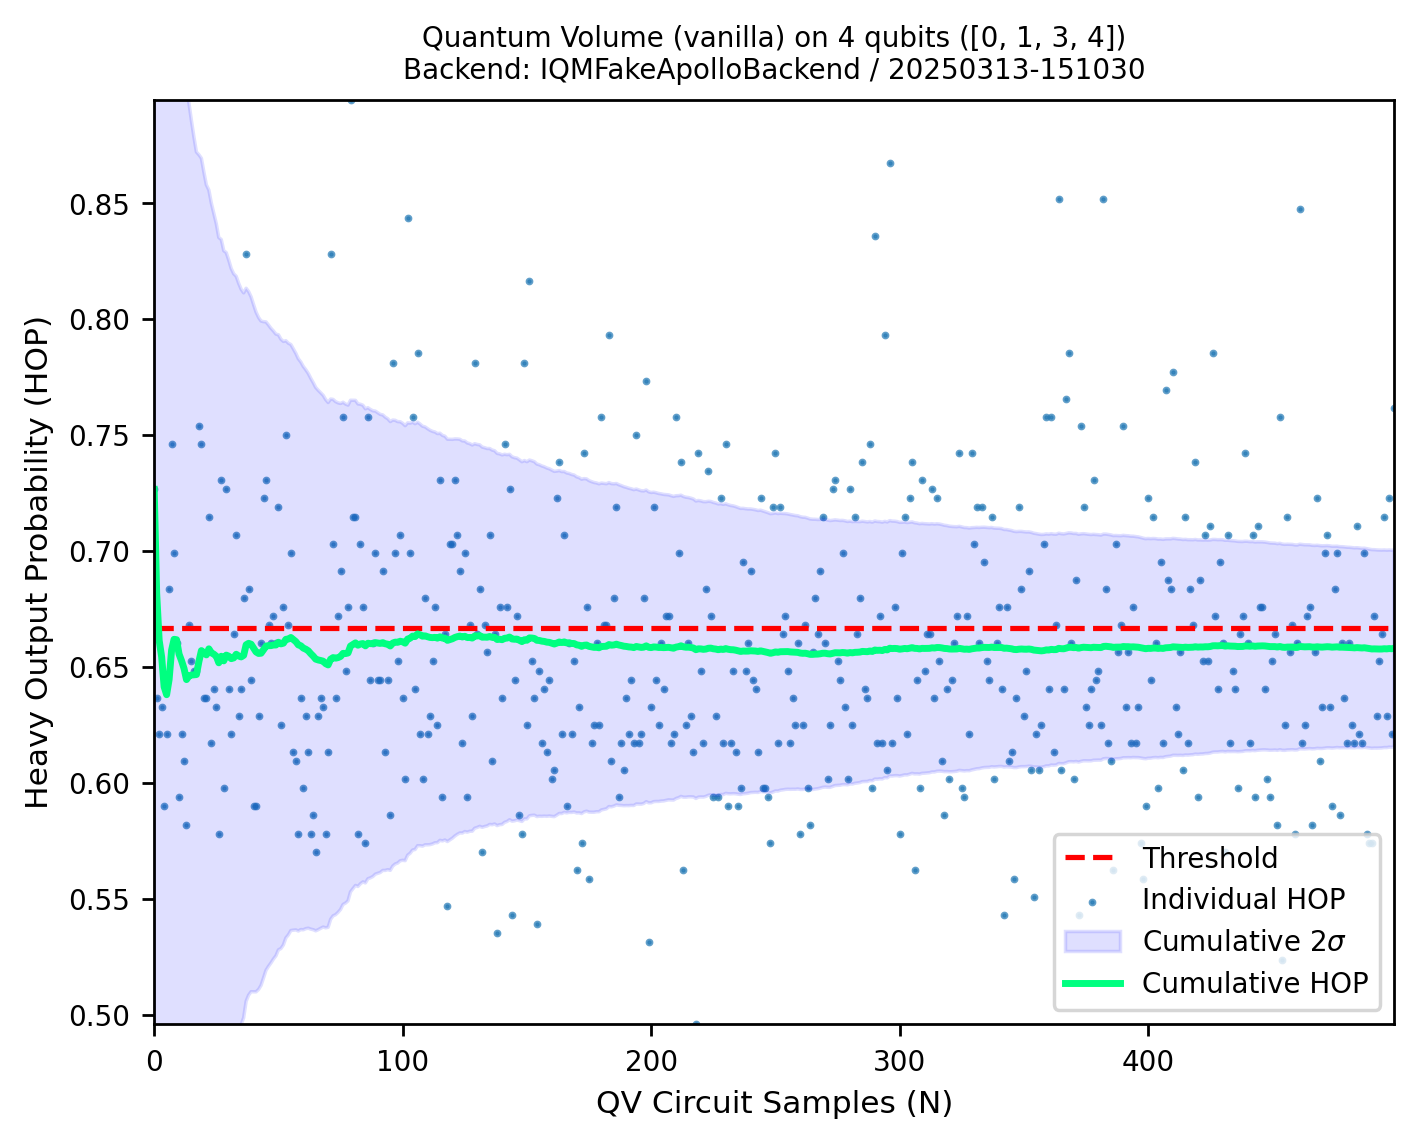

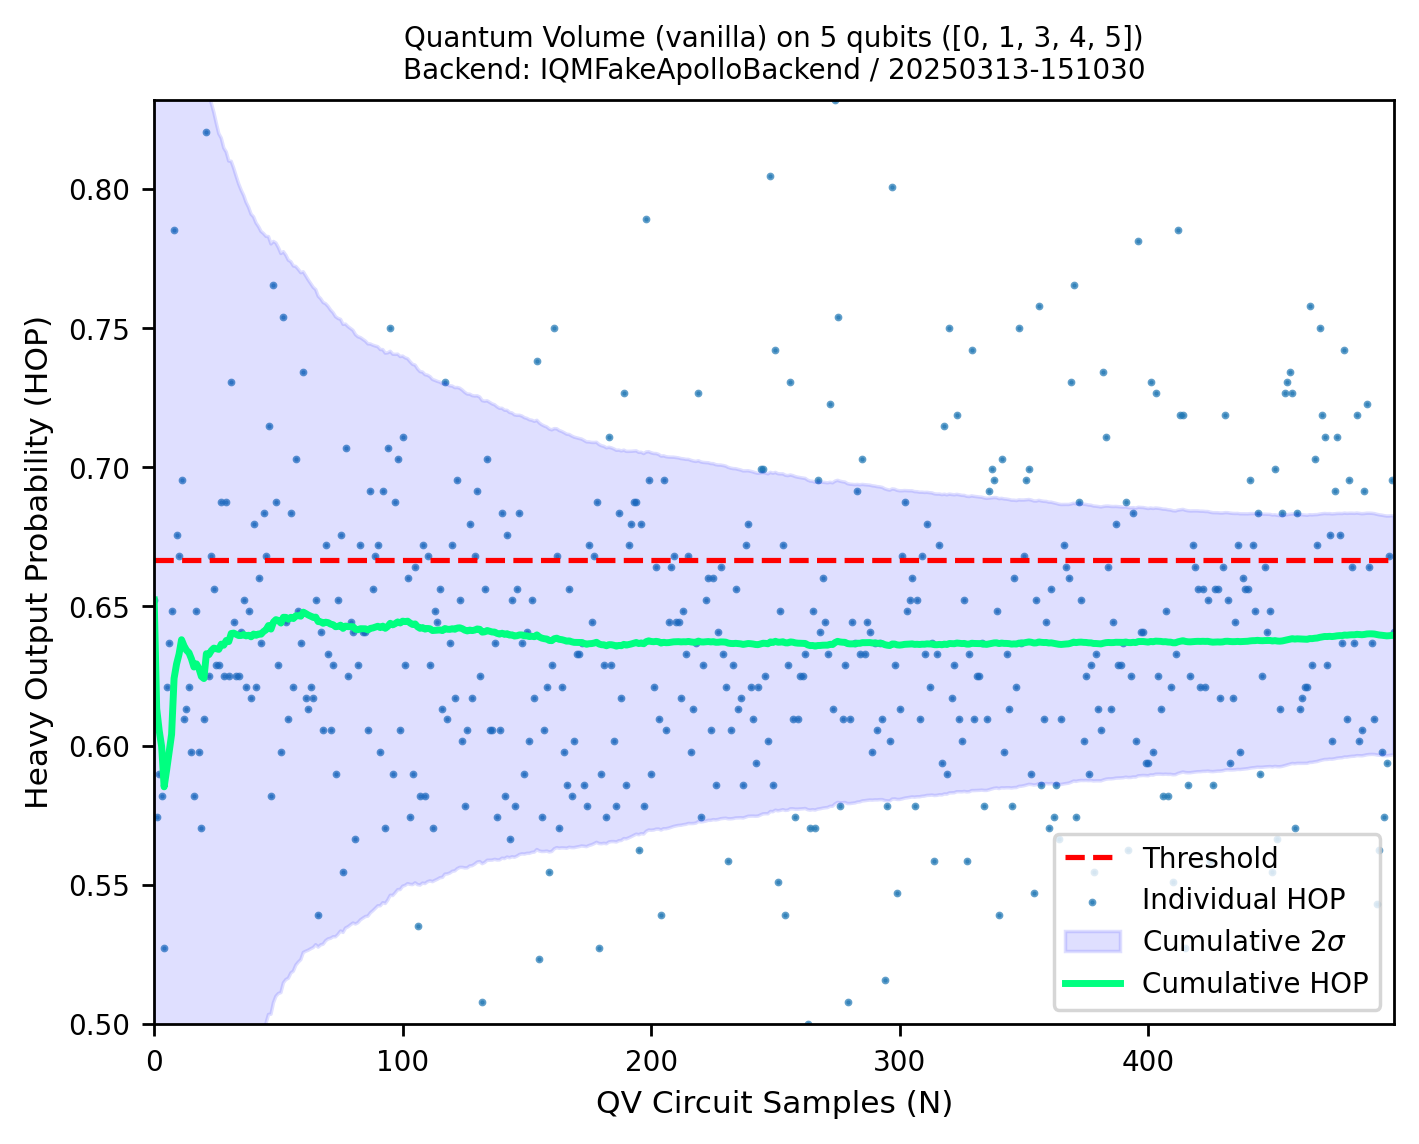

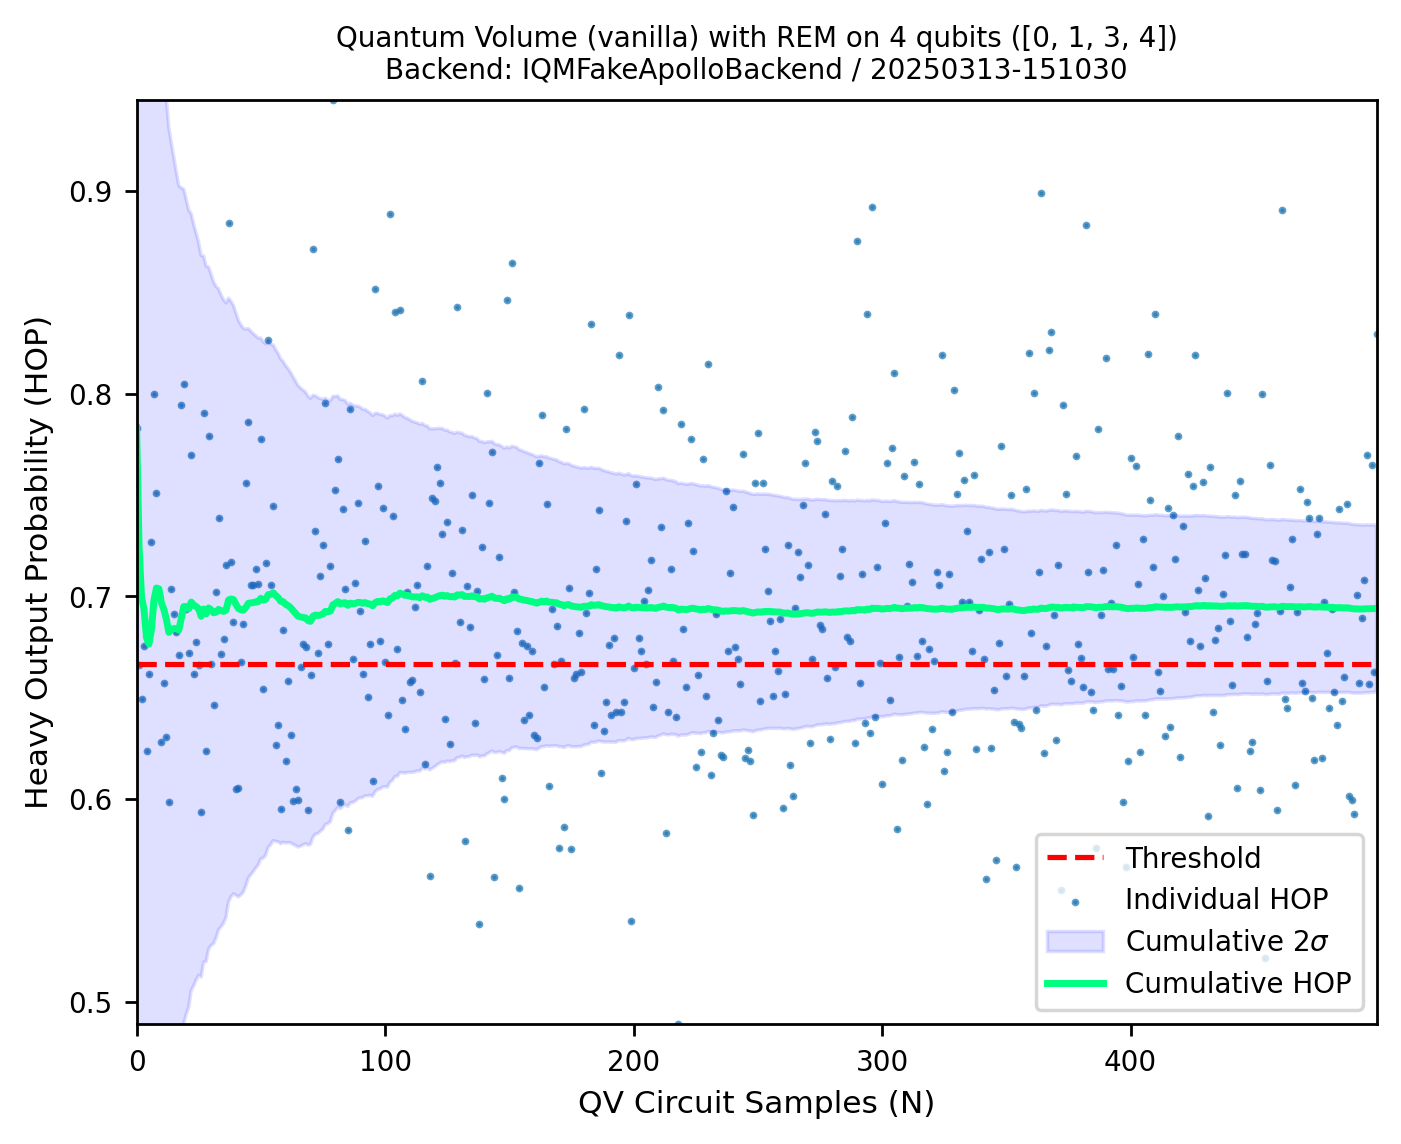

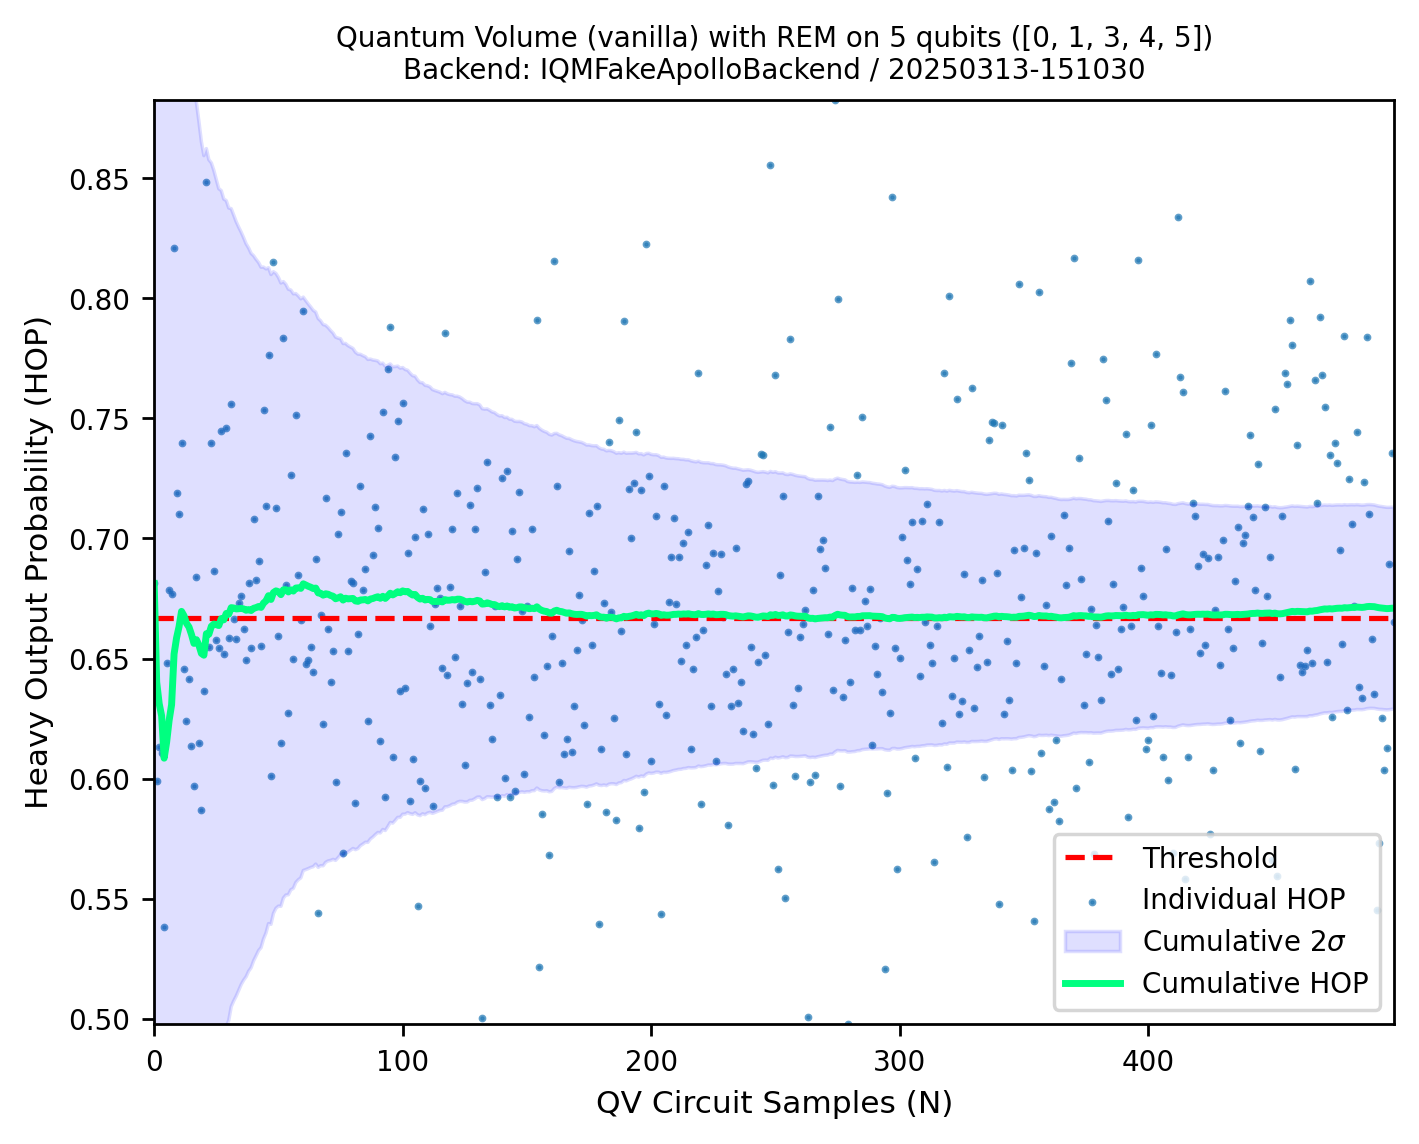

In [58]:
for v in result0_qv.plots.values():
    display(v)

## CLOPS

In [59]:
from iqm.benchmarks.quantum_volume.clops import *

In [60]:
EXAMPLE_CLOPS = CLOPSConfiguration(
    qubits=[0,1,3,4,5],
    num_circuits=100, # By definition set to 100
    num_updates=10, # By definition set to 10
    num_shots=100, # By definition set to 100
    calset_id=None,
    clops_h_bool=True,
    qiskit_optim_level=3,
    optimize_sqg=True,
    routing_method="sabre",
    physical_layout="fixed",
)

In [61]:
benchmark_clops = CLOPSBenchmark(backend, EXAMPLE_CLOPS)
run_clops = benchmark_clops.run()

2025-03-13 15:12:26,159 - iqm.benchmarks.logging_config - INFO - NB: CLOPS should be estimated with same qubit layout and optional inputs used to establish QV!
2025-03-13 15:12:26,161 - iqm.benchmarks.logging_config - INFO - Now generating 100 parametrized circuit templates on qubits [0, 1, 3, 4, 5]
2025-03-13 15:12:26,791 - iqm.benchmarks.logging_config - INFO - Will transpile all 100 circuits according to "fixed" physical layout
2025-03-13 15:12:26,791 - iqm.benchmarks.logging_config - INFO - Transpiling for backend IQMFakeApolloBackend with optimization level 3, sabre routing method including SQG optimization all circuits
2025-03-13 15:12:40,008 - iqm.benchmarks.logging_config - INFO - CLOPS time started
2025-03-13 15:12:40,022 - iqm.benchmarks.logging_config - INFO - Update 1/10
Assigning random parameters to all 100 circuits
2025-03-13 15:12:48,661 - iqm.benchmarks.logging_config - INFO - Executing the corresponding circuit batch
2025-03-13 15:12:48,665 - iqm.benchmarks.logging_co

In [62]:
result_clops = benchmark_clops.analyze()

2025-03-13 15:13:59,131 - iqm.benchmarks.logging_config - INFO - Counting the number of parallel 2Q layer depths in each circuit
2025-03-13 15:14:00,436 - iqm.benchmarks.logging_config - INFO - There is no elapsed-time data associated to jobs (e.g., execution on simulator)


In [75]:
result_clops.plot_all()

In [76]:
result_clops.observations

[BenchmarkObservation(name='clops_v', value=6353, identifier=BenchmarkObservationIdentifier(qubit_indices=[0, 1, 3, 4, 5]), uncertainty=None),
 BenchmarkObservation(name='clops_h', value=19060, identifier=BenchmarkObservationIdentifier(qubit_indices=[0, 1, 3, 4, 5]), uncertainty=None)]

## GHZ state fidelity

In [64]:
from iqm.benchmarks.entanglement.ghz import *

In [65]:
MINIMAL_GHZ = GHZConfiguration(
    state_generation_routine="tree",
            custom_qubits_array=[
                [0,1],
                [0,1,3],
                [0,1,3,4],
                [0,1,3,4,5],
            ],
    shots=1000,
    fidelity_routine="coherences", 
    rem=True,
    mit_shots=1000,
)

In [66]:
benchmark_ghz = GHZBenchmark(backend, MINIMAL_GHZ)
run_ghz = benchmark_ghz.run()

2025-03-13 15:14:02,062 - iqm.benchmarks.logging_config - INFO - Now generating a 2-qubit GHZ state on qubits [0, 1]
2025-03-13 15:14:02,078 - iqm.benchmarks.logging_config - INFO - Transpiling for backend IQMFakeApolloBackend with optimization level 3, sabre routing method including SQG optimization all circuits
2025-03-13 15:14:02,094 - iqm.benchmarks.logging_config - INFO - Transpiling for backend IQMFakeApolloBackend with optimization level 3, sabre routing method including SQG optimization all circuits
2025-03-13 15:14:02,237 - iqm.benchmarks.logging_config - INFO - Submitting batch with 7 circuits corresponding to qubits [0, 1]
2025-03-13 15:14:02,237 - iqm.benchmarks.logging_config - INFO - Now generating a 3-qubit GHZ state on qubits [0, 1, 3]
2025-03-13 15:14:02,303 - iqm.benchmarks.logging_config - INFO - Transpiling for backend IQMFakeApolloBackend with optimization level 3, sabre routing method including SQG optimization all circuits
2025-03-13 15:14:02,387 - iqm.benchmarks

In [67]:
result = benchmark_ghz.analyze()

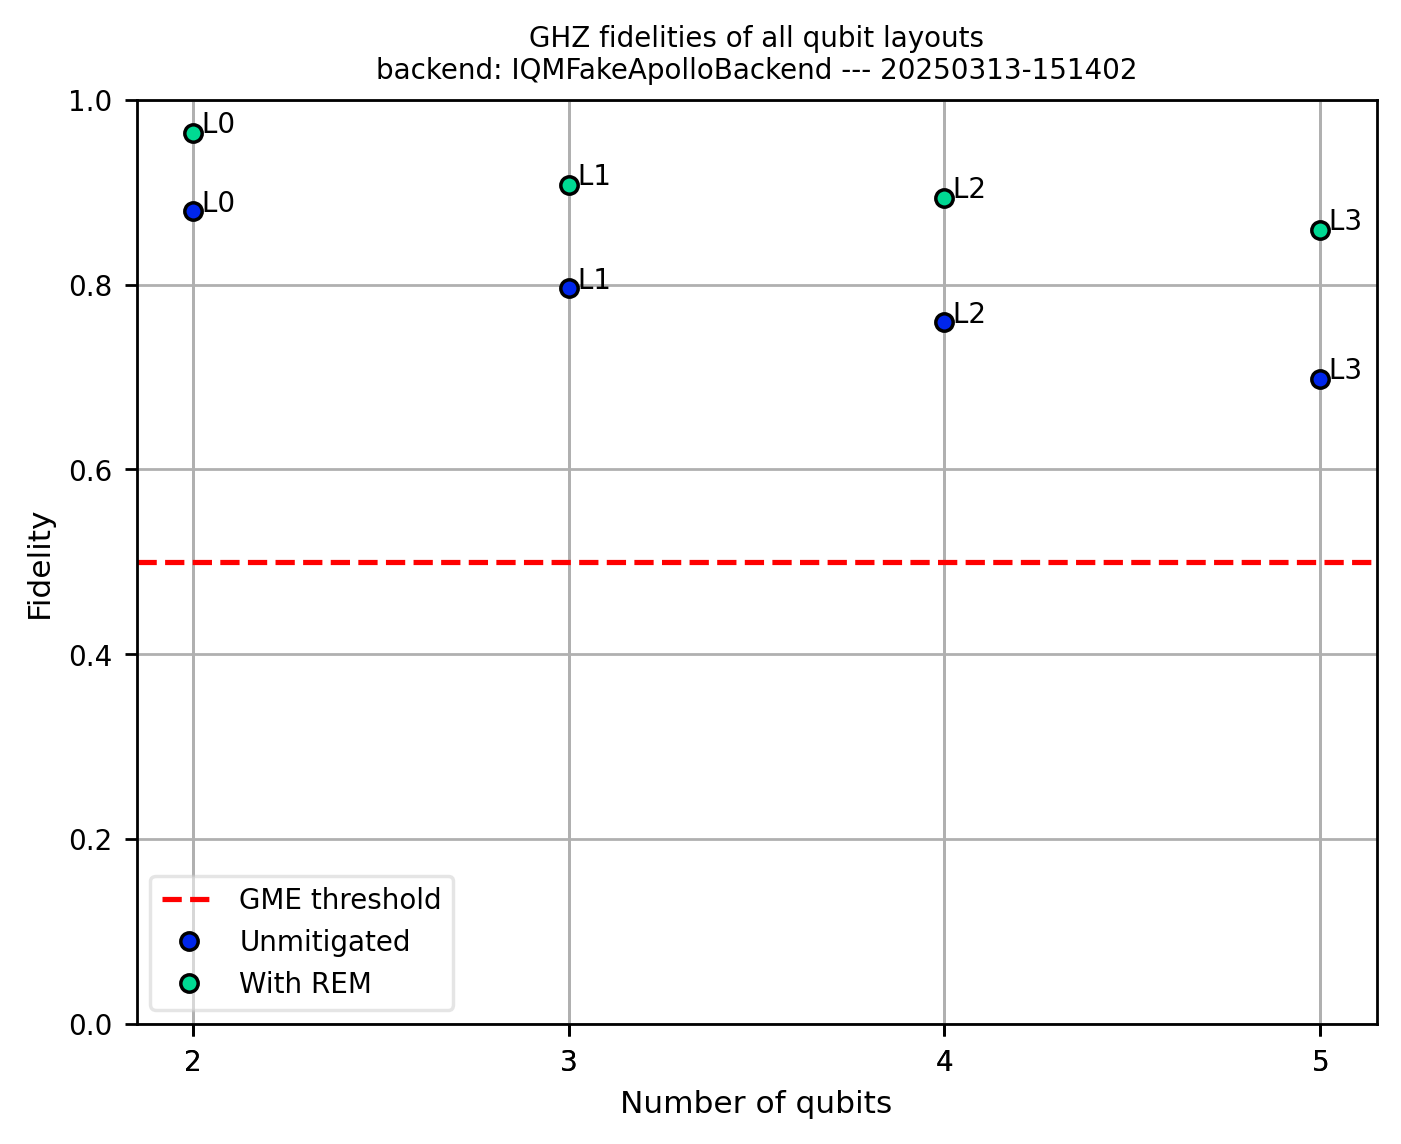

In [68]:
# Show observations for a specific qubit layout
qubit_layout = [0,1,2]
for observation in result.observations:
    if observation.identifier.string_identifier == str(qubit_layout):
        print(f"{observation.name}: {observation.value} +/- {observation.uncertainty}")
# Plot fidelities for all layouts
result.plot_all()

## QScore

In [69]:
from iqm.benchmarks.optimization.qscore import *
import random

In [70]:
EXAMPLE_QSCORE = QScoreConfiguration(
    num_instances = 10,
    num_qaoa_layers= 1,
    shots = 10_000,
    calset_id=None, # calibration set ID, default is None
    min_num_nodes =  2,
    max_num_nodes = 5,
    use_virtual_node = True,
    use_classically_optimized_angles = True,
    choose_qubits_routine = "custom",
    custom_qubits_array=[
                    [1, 0],
                    [1, 0, 3],
                    [1, 0, 3, 4],
                    [1, 0, 3, 4, 5]],
    seed = random.randint(1, 999999),
    )

In [71]:
benchmark_qscore = QScoreBenchmark(backend, EXAMPLE_QSCORE)
run_qscore = benchmark_qscore.run()

2025-03-13 15:14:09,830 - iqm.benchmarks.logging_config - INFO - Retrieving all counts
2025-03-13 15:14:10,489 - iqm.benchmarks.logging_config - INFO - Retrieving all counts
2025-03-13 15:14:10,951 - iqm.benchmarks.logging_config - INFO - Retrieving all counts
2025-03-13 15:14:11,427 - iqm.benchmarks.logging_config - INFO - Retrieving all counts
2025-03-13 15:14:11,880 - iqm.benchmarks.logging_config - INFO - Retrieving all counts
2025-03-13 15:14:12,380 - iqm.benchmarks.logging_config - INFO - Retrieving all counts
2025-03-13 15:14:12,896 - iqm.benchmarks.logging_config - INFO - Retrieving all counts
2025-03-13 15:14:13,375 - iqm.benchmarks.logging_config - INFO - Retrieving all counts
2025-03-13 15:14:13,958 - iqm.benchmarks.logging_config - INFO - Retrieving all counts
2025-03-13 15:14:14,431 - iqm.benchmarks.logging_config - INFO - Retrieving all counts
2025-03-13 15:14:14,928 - iqm.benchmarks.logging_config - INFO - Retrieving all counts
2025-03-13 15:16:40,612 - iqm.benchmarks.lo

In [72]:
result_qscore = benchmark_qscore.analyze()

2025-03-13 15:16:49,912 - iqm.benchmarks.logging_config - INFO - Q-Score = 3 passed with approximation ratio (Beta) 0.4721; Avg MaxCut size: 1.1866
2025-03-13 15:16:50,301 - iqm.benchmarks.logging_config - INFO - Q-Score = 4 passed with approximation ratio (Beta) 0.5760; Avg MaxCut size: 2.3202
2025-03-13 15:16:50,844 - iqm.benchmarks.logging_config - INFO - Q-Score = 5 passed with approximation ratio (Beta) 0.5666; Avg MaxCut size: 3.6277
2025-03-13 15:16:51,639 - iqm.benchmarks.logging_config - INFO - Q-Score = 6 passed with approximation ratio (Beta) 0.5362; Avg MaxCut size: 5.1528


In [73]:
result_qscore.observations

[BenchmarkObservation(name='mean_approximation_ratio', value=0.4720649335834727, identifier=BenchmarkObservationIdentifier(qubit_indices=3), uncertainty=0.264883828589849),
 BenchmarkObservation(name='is_succesful', value='True', identifier=BenchmarkObservationIdentifier(qubit_indices=3), uncertainty=None),
 BenchmarkObservation(name='Qscore_result', value=3, identifier=BenchmarkObservationIdentifier(qubit_indices=3), uncertainty=None),
 BenchmarkObservation(name='mean_approximation_ratio', value=0.5759620786516855, identifier=BenchmarkObservationIdentifier(qubit_indices=4), uncertainty=0.13942395641806907),
 BenchmarkObservation(name='is_succesful', value='True', identifier=BenchmarkObservationIdentifier(qubit_indices=4), uncertainty=None),
 BenchmarkObservation(name='Qscore_result', value=4, identifier=BenchmarkObservationIdentifier(qubit_indices=4), uncertainty=None),
 BenchmarkObservation(name='mean_approximation_ratio', value=0.5666397249858852, identifier=BenchmarkObservationIden

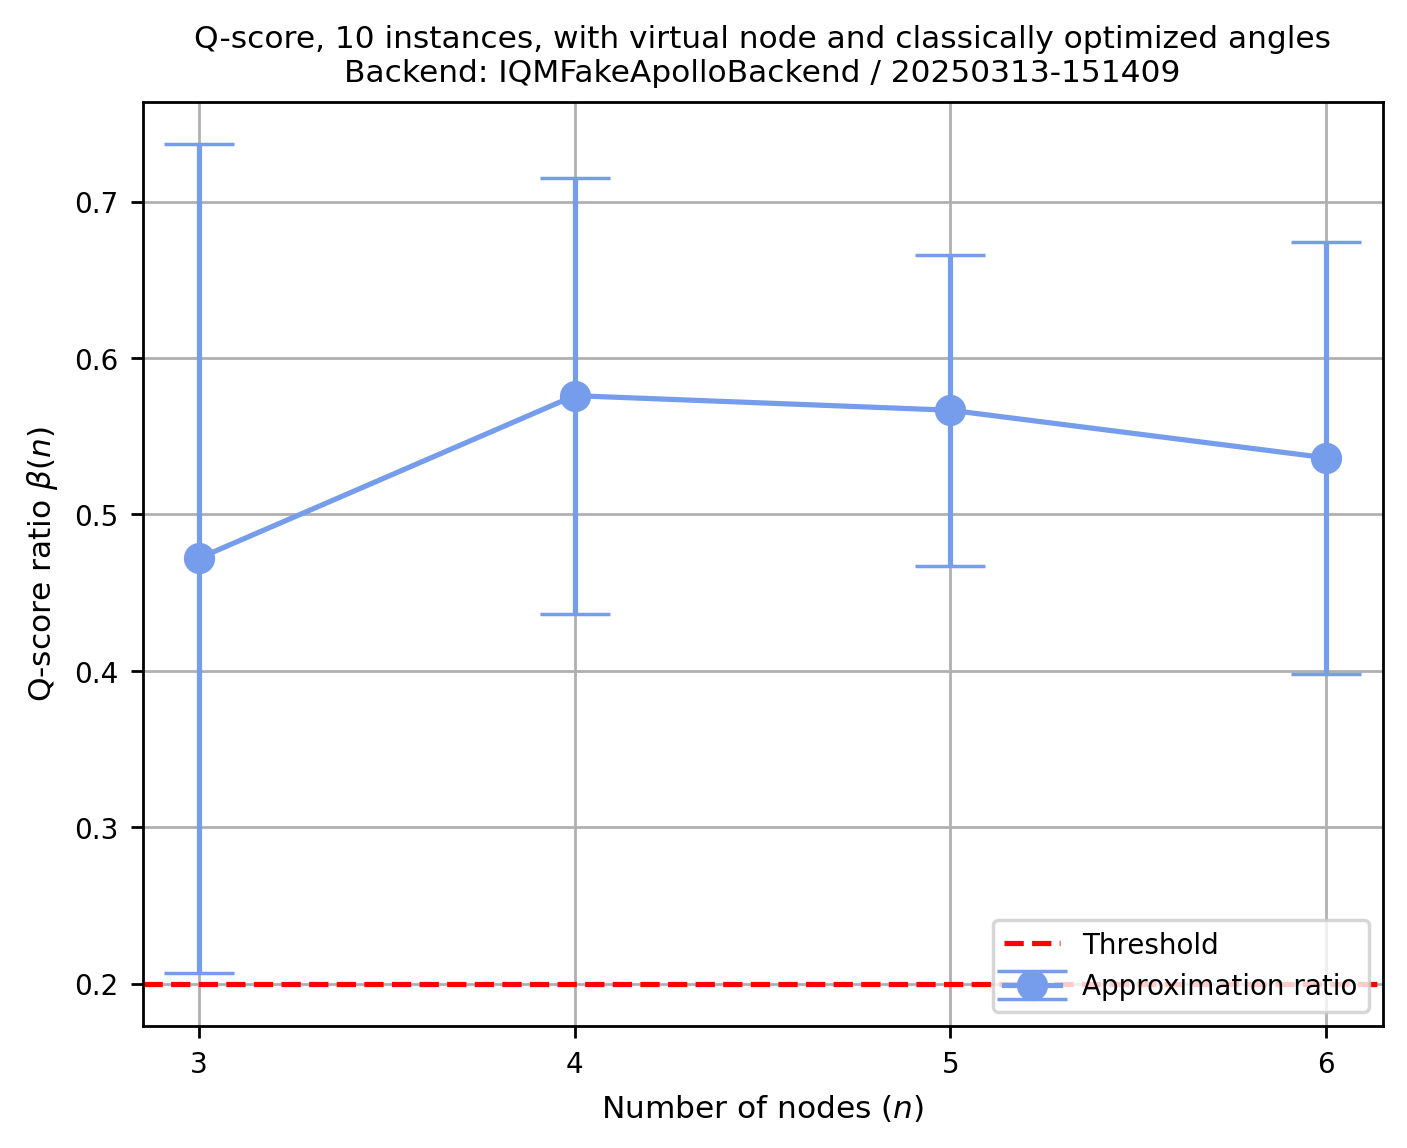

In [74]:
result_qscore.plot_all()